<h1 style="text-align:center;">TELCO CUSTOMER CHURN</h1>


<div style="text-align:center;">
    <img src="attachment:62ad7254-a233-4f1f-bc86-5301002756cf.jpg" alt="Image Description">
</dier>


## IMPORT THE LIBRARIES

In [280]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from scipy.stats import skew 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import cufflinks as cf
import networkx as nx
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import matplotlib.gridspec as gridspec
from collections import Counter
import pickle


In [281]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

## READ THE DATA

In [282]:
df = pd.read_csv("teleco_customer_churn.csv")

In [283]:
data = df.copy()

In [284]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In the data totalcharges column is float datatype but it shows object datatype.

In [286]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"],errors="coerce")

In [287]:
# drop missing values
data.dropna(inplace=True)

# drop customerID 
data.drop('customerID', axis=1, inplace=True)

In [288]:
data.describe().T

count         mean          std    min       25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

In [289]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [290]:
# apply loop check unique value without int or float in dataset
for col in data.columns:
    if data[col].dtype != 'int64' and data[col].dtype != 'float64':
        print(f'{col} : {data[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [291]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## CHECKING FOR THE DISTRIBUTION

NUMERICAL DISTRIBUTION

In [292]:
columns = list(data.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(data[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1]

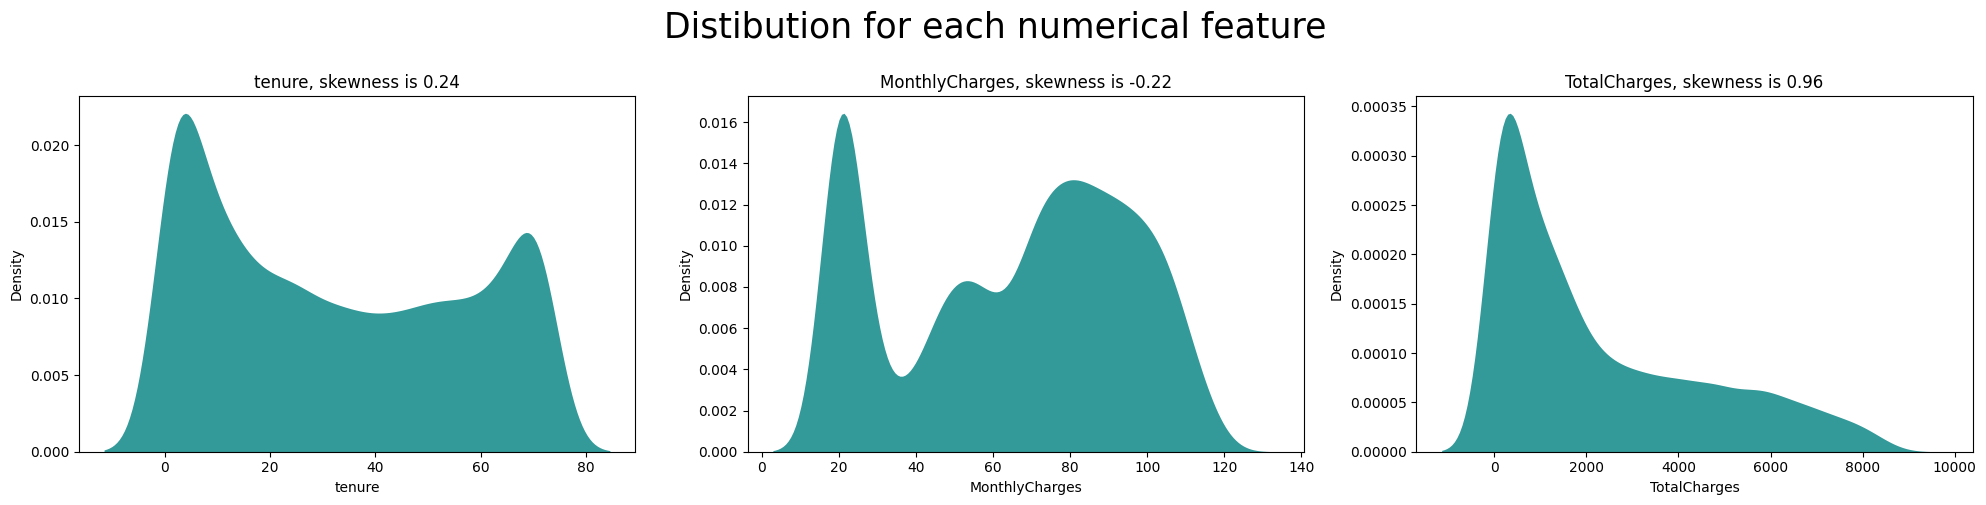

In [293]:
# Checking for distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(20,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

dist_custom(dataset=data, columns_list=numeric_columns, rows=1, cols=3, suptitle='Distibution for each numerical feature')
plt.tight_layout()

- The first observation with a skewness value of 0.24 suggests a slight right-skewed distribution, indicating that there are slightly more data points on the lower end of the range.
- The second observation with a skewness value of -0.22 suggests a slight left-skewed distribution, indicating that there are slightly more data points on the higher end of the range.
- The third observation with a skewness value of 0.96 suggests a strongly right-skewed distribution, indicating that there are significantly more data points on the lower end of the range, with a much longer right tail.

The skewness value is relatively small, suggesting that the skewness is not very pronounced. However, we will be further dealing with the skewness of Totalcharges in the notebook.



CATEGORICAL DISTRIBUTION

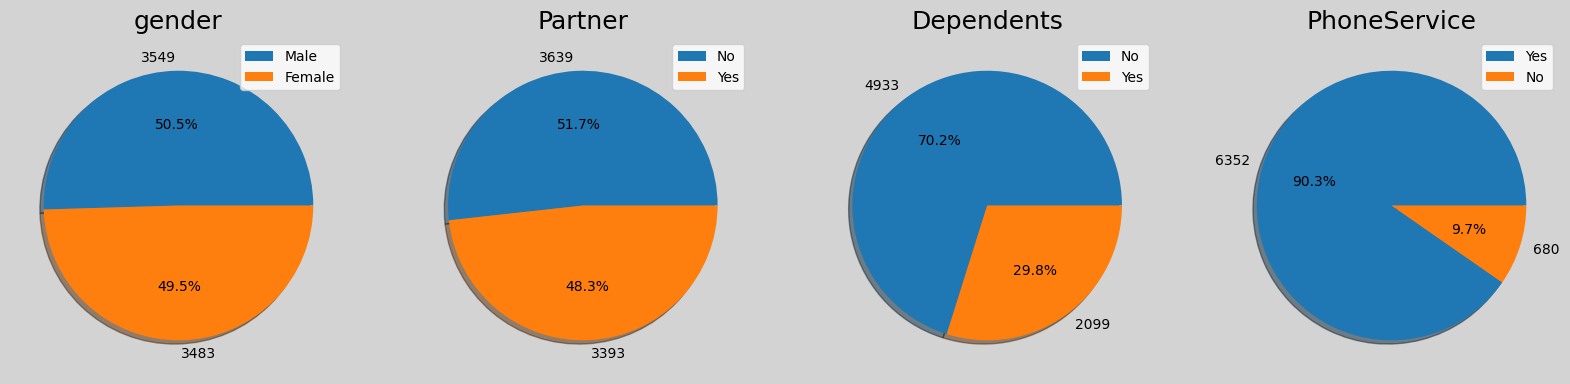

In [294]:
categ_columns = list(data.select_dtypes(include = ['object']).columns)

fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(categ_columns[:4]):
    ax = axes[i]
    d = data[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%",shadow=True)
    ax.set_title(column,size=18)
    ax.legend(d.index)

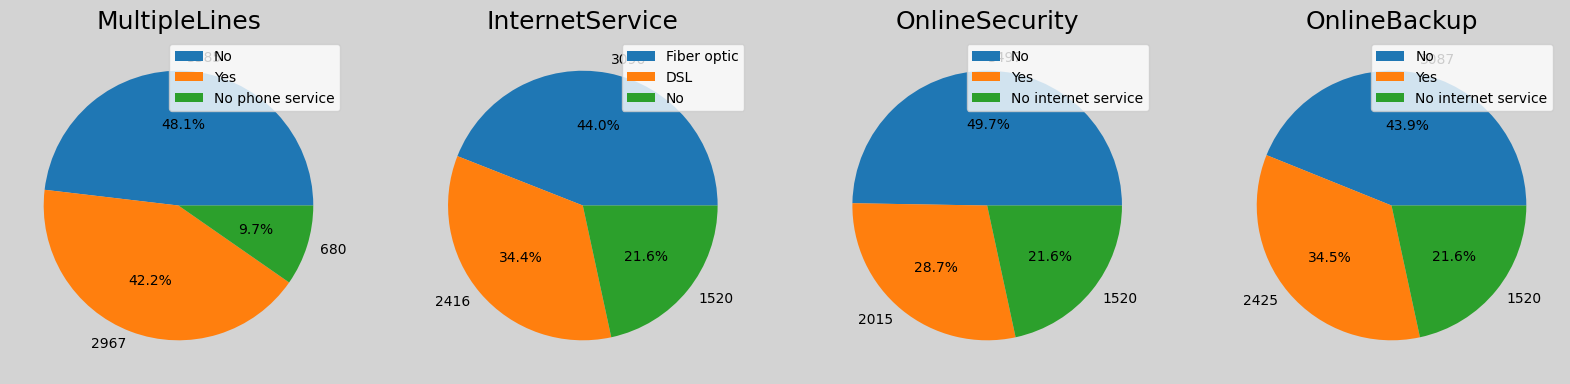

In [295]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")


for i, column in enumerate(categ_columns[4:8]):
    ax = axes[i]
    d = data[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%")
    ax.set_title(column,size=18)
    ax.legend(d.index,loc="best")

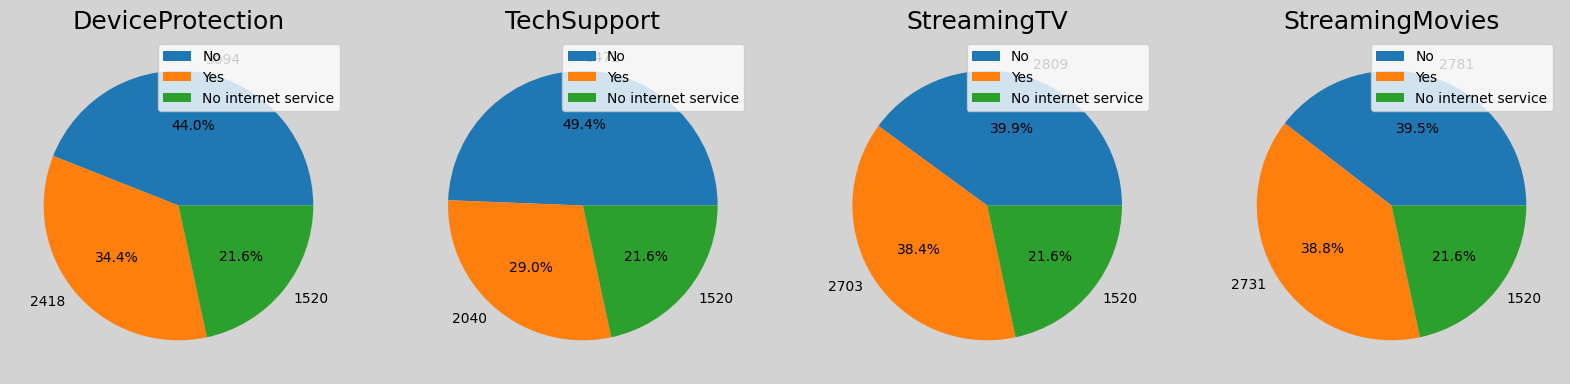

In [296]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(categ_columns[8:12]):
    ax = axes[i]
    d = data[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%")
    ax.set_title(column,size=18)
    ax.legend(d.index)

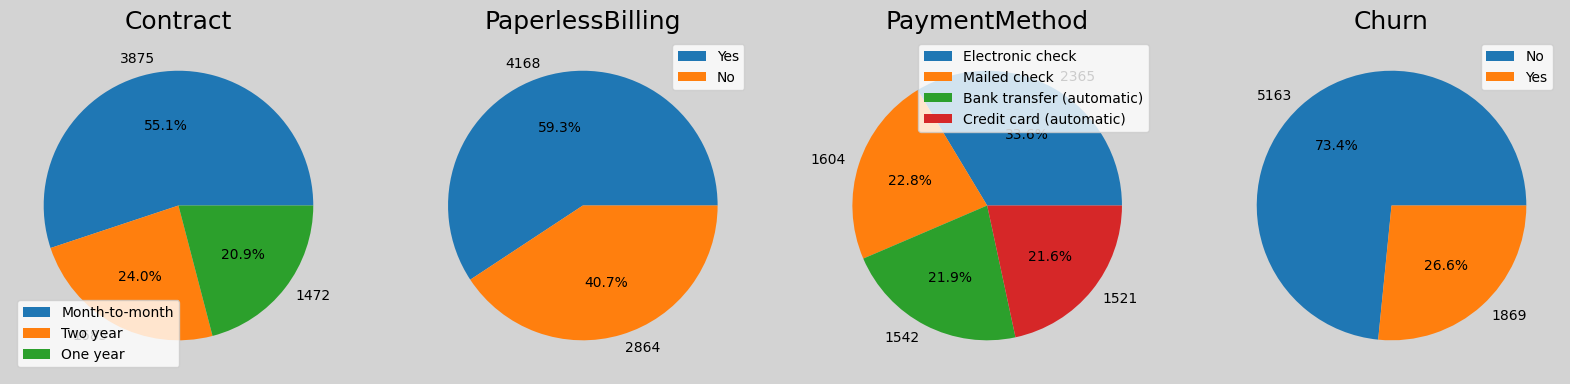

In [297]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(categ_columns[12:]):

        ax = axes[i]
        d = data[column].value_counts()
        ax.pie(d, labels=d.values,autopct="%1.1f%%")
        ax.set_title(column,size=18)
        ax.legend(d.index)

## VISUALIZING THE DATA

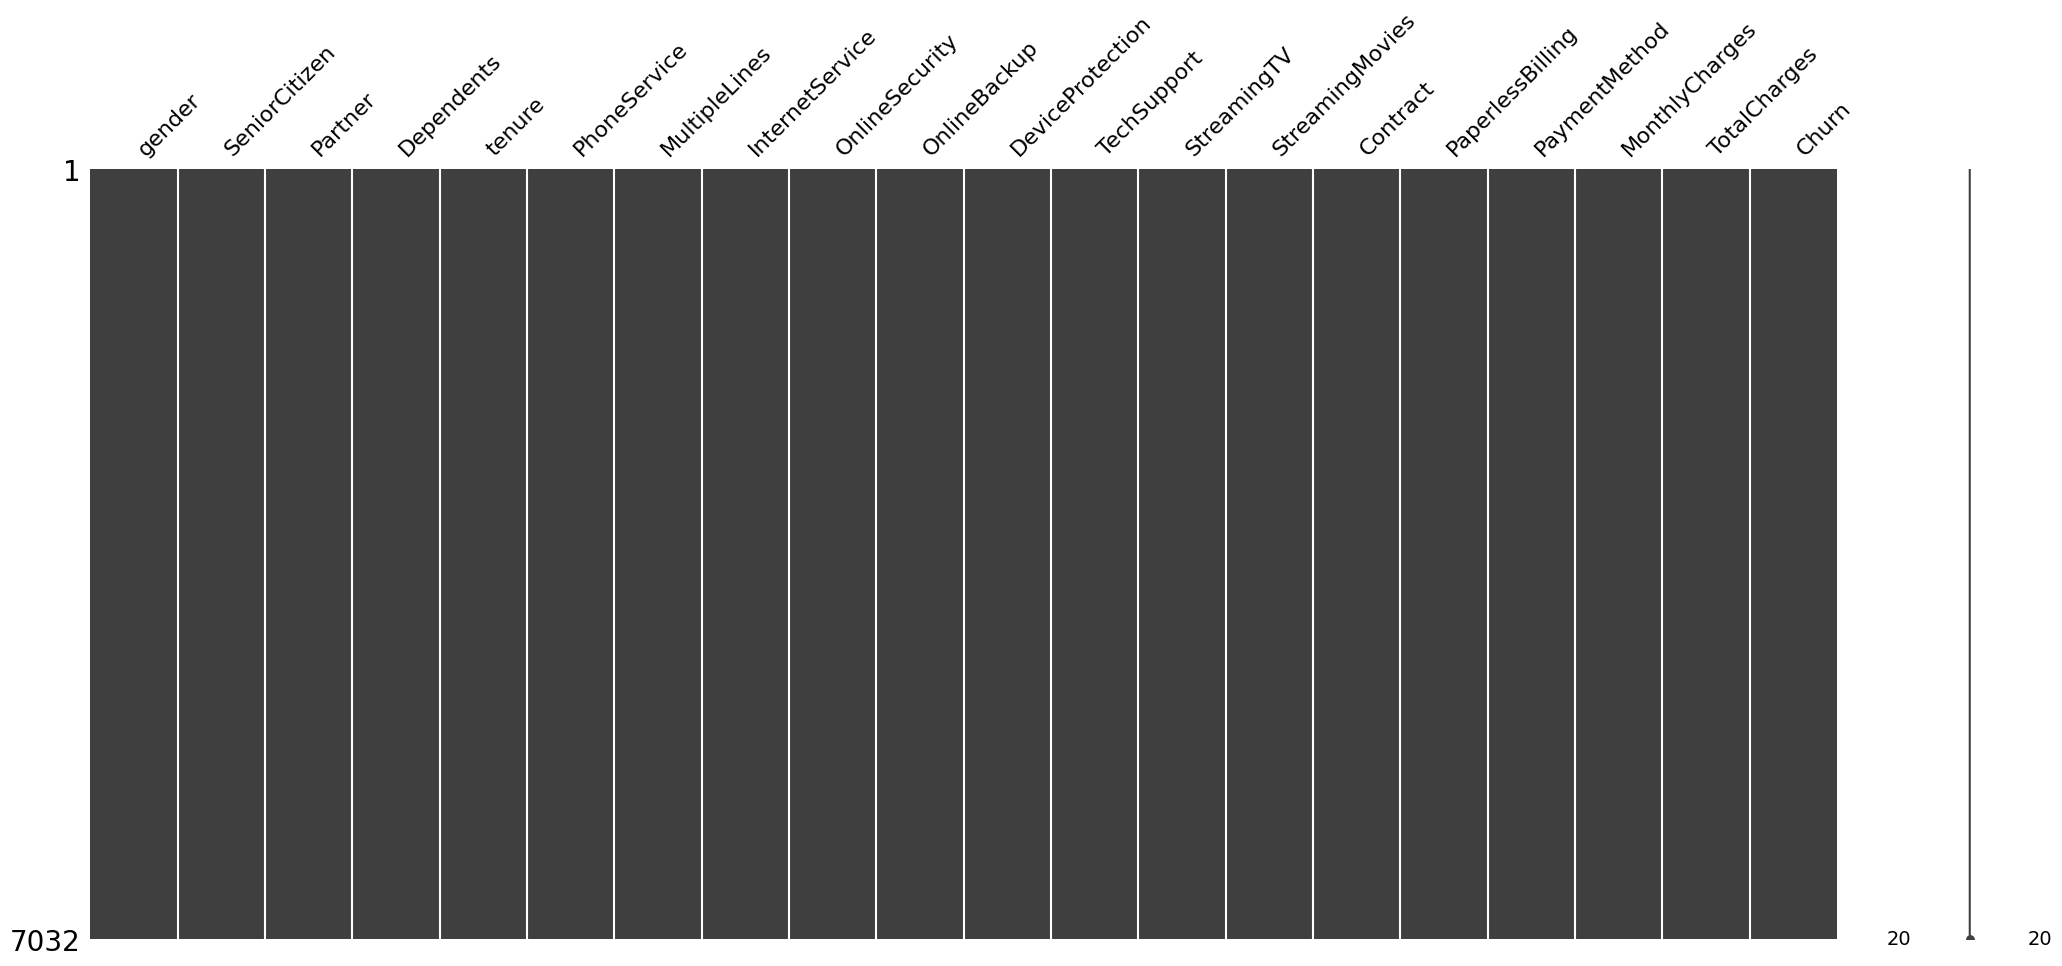

In [298]:
# Visualize missing values as a matrix
msno.matrix(data);

Therfore,no missing values are found.

In [299]:
print(data[['MonthlyCharges', 'TotalCharges', 'Churn']].info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyCharges  7032 non-null   float64
 1   TotalCharges    7032 non-null   float64
 2   Churn           7032 non-null   object 
dtypes: float64(2), object(1)
memory usage: 219.8+ KB
None


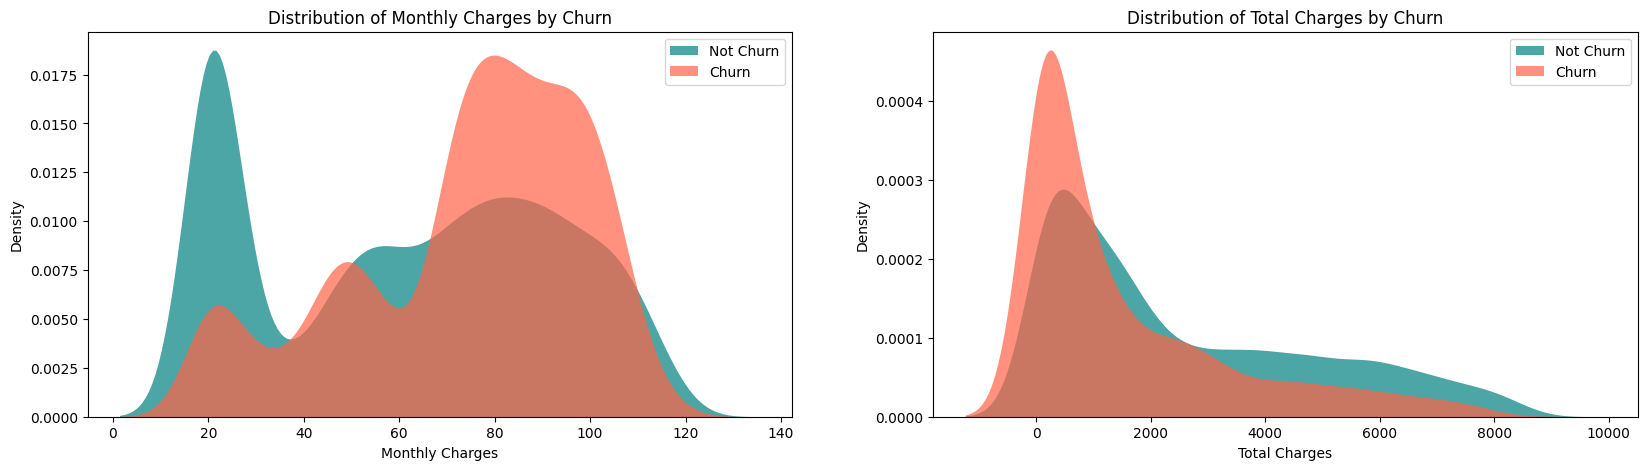

In [300]:
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

plt.subplot(1, 2, 1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == "No")], color='#008080', fill=True, alpha=.7, linewidth=0)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == "Yes")], color='#FF6347', fill=True, alpha=.7, linewidth=0)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

plt.subplot(1, 2, 2)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == "No")], color='#008080', fill=True, alpha=.7, linewidth=0)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == "Yes")], color='#FF6347', fill=True, alpha=.7, linewidth=0)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')

plt.show()


If the Monthly charges are increased per month then Customer churning gets increased as compared to Total charges.


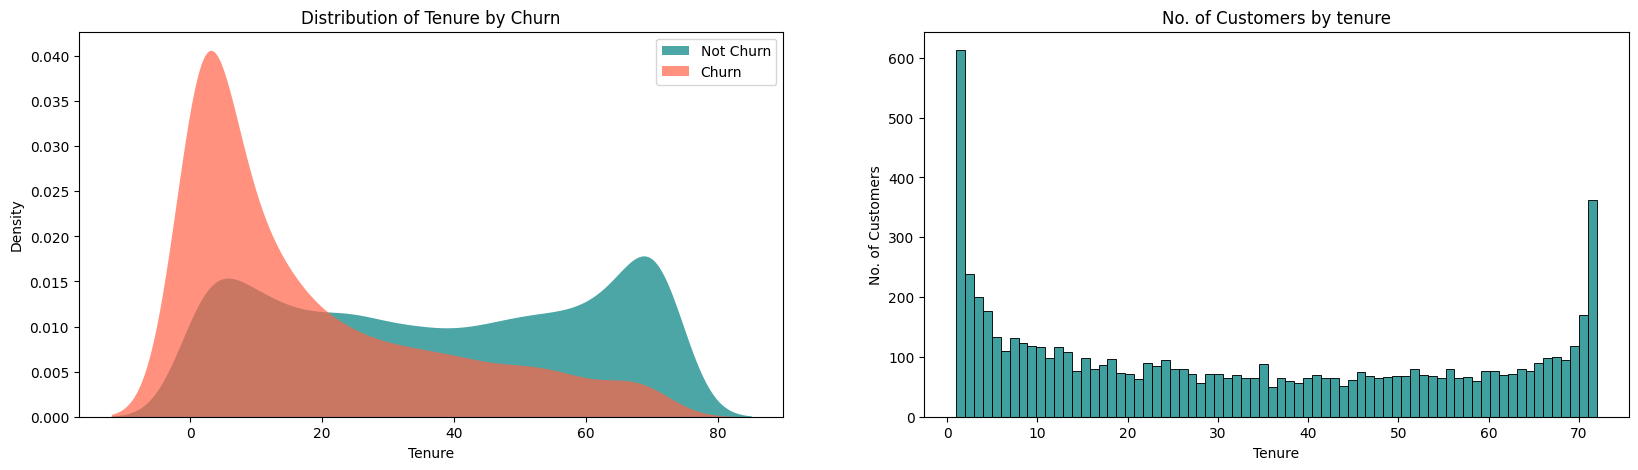

In [301]:
#plt.figure(figsize=(7,3))

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(data.tenure[(data["Churn"] == "No")], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(data.tenure[(data["Churn"] == "Yes")], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of Tenure by Churn')

plt.subplot(1,2,2)
ax = sns.histplot(data["tenure"], bins=72, kde=False, color='#008080')
ax.set(title = "No. of Customers by tenure")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')

plt.show()

The longer the customer has been with the provider the more likely he will not churn.

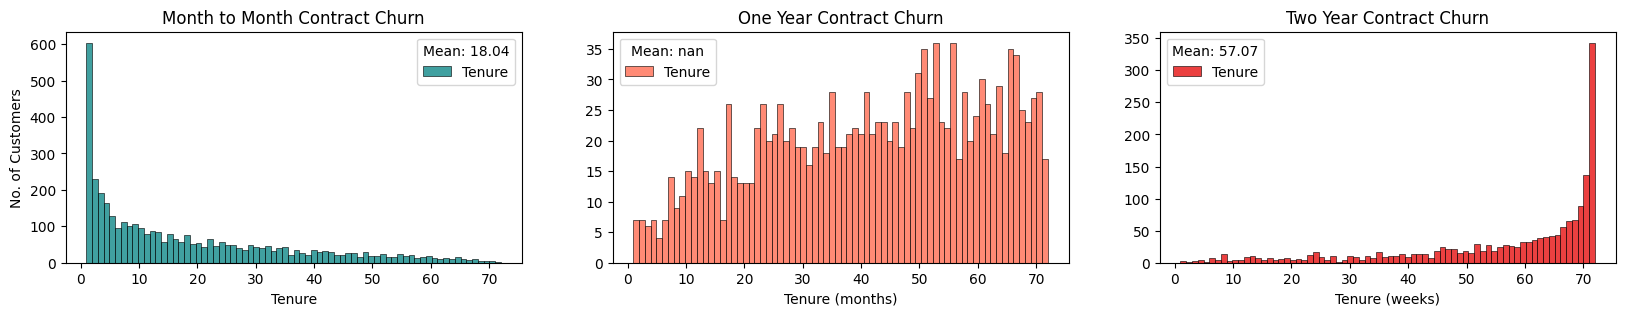

In [302]:
two_year_mean = round(data[data['Contract']=="Two year"]['tenure'].mean(),2)
month_mean = round(data[data['Contract']=="Month-to-month"]['tenure'].mean(),2)
year_mean = round(data[data['Contract']=="Onr year"]['tenure'].mean(),2)

fig = plt.subplots(nrows=1, ncols=3, figsize = (20,3))

plt.subplot(1,3,1)
ax = sns.histplot(data[data['Contract']=="Month-to-month"]['tenure'], bins=72, color = '#008080')
ax.legend(['Tenure'],loc='upper right', title=(f'Mean: {month_mean}'))
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')
ax.set_title('Month to Month Contract Churn')

plt.subplot(1,3,2)
ax = sns.histplot(data[data['Contract']=="One year"]['tenure'], bins=72, color = '#FF6347')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract Churn')

plt.subplot(1,3,3)
ax = sns.histplot(data[data['Contract']=="Two year"]['tenure'], bins=72, color = '#E50000')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {two_year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (weeks)')
ax.set_title('Two Year Contract Churn')

plt.show()

- a lot of Customers churned after just a month
- a lot of Customers are with the provider for 72 weeks
- the longer the contract, the longer customer stays with the provider (higher mean score)

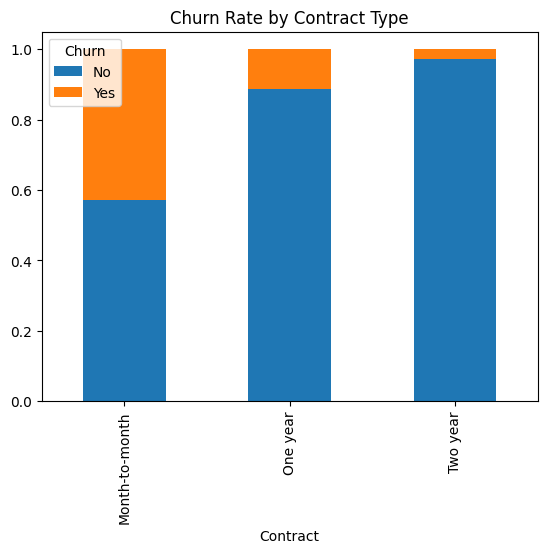

In [303]:
# Churn rate by Contract type : Month-to-month customers might show a higher churn rate than those with longer contracts.
contract_churn = data.groupby(['Contract', 'Churn']).size().unstack()
contract_churn_norm = contract_churn.div(contract_churn.sum(axis=1), axis=0)
contract_churn_norm.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.show()

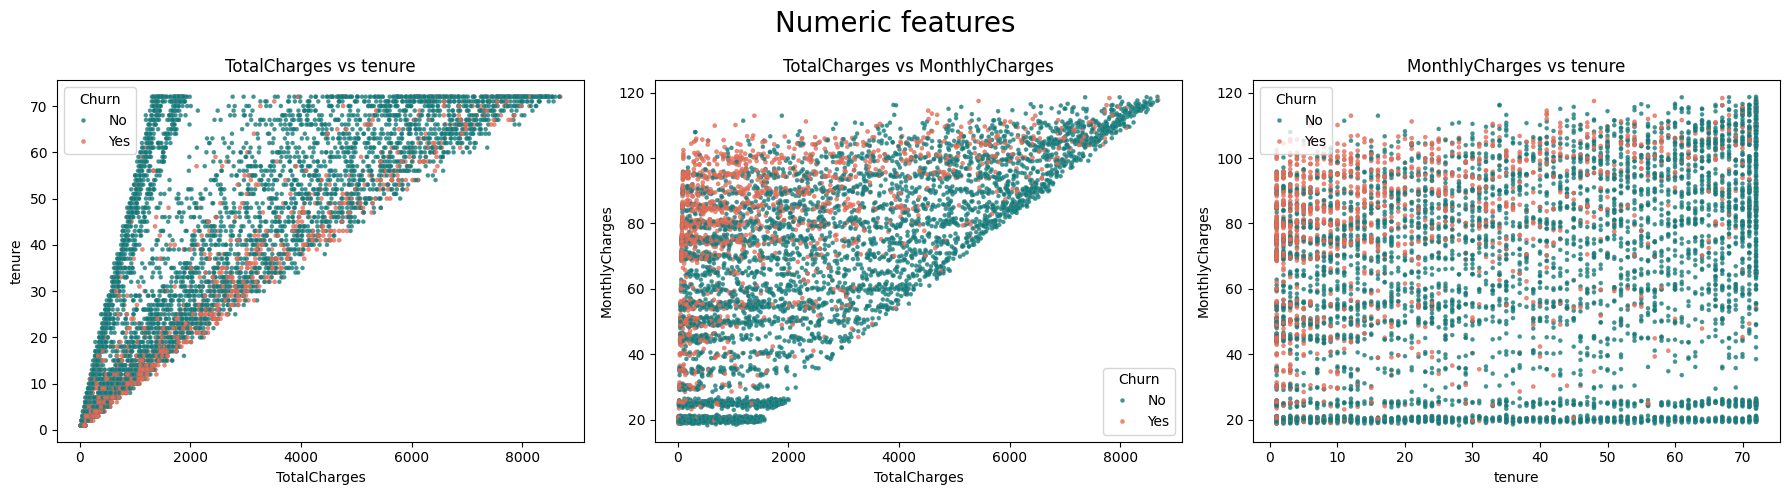

In [304]:
palette2 = ['#008080','#FF6347']

fig = plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
ax1 = sns.scatterplot(x = data['TotalCharges'], y = data['tenure'], hue = "Churn",
                    data = data, palette = palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('TotalCharges vs tenure')

plt.subplot(1,3,2)
ax2 = sns.scatterplot(x = data['TotalCharges'], y = data['MonthlyCharges'], hue = "Churn",
                    data = data, palette =palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('TotalCharges vs MonthlyCharges')

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x = data['tenure'], y = df['MonthlyCharges'], hue = "Churn",
                    data = data, palette =palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('MonthlyCharges vs tenure')

fig.suptitle('Numeric features', fontsize = 20)
plt.tight_layout()
plt.show()

Customer with higher monthly charges are more likely to churn.

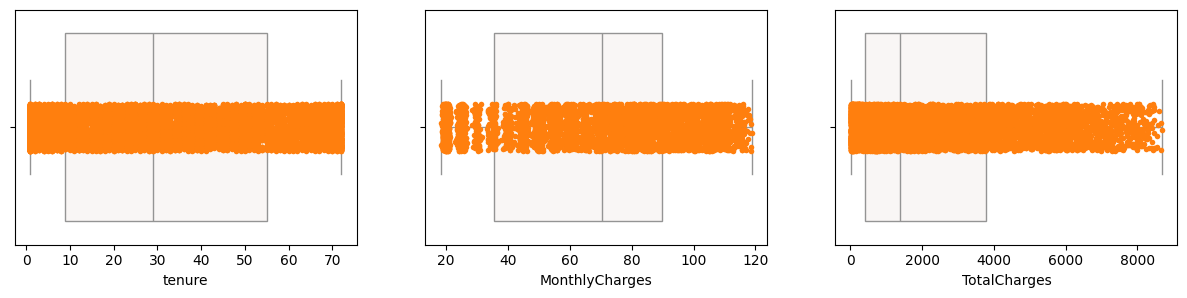

In [305]:
## Prepare the plot 
rows = 7
cols = 3
fig = plt.figure(figsize = (15,25))

for i, col in enumerate(numeric_columns):
    ax = fig.add_subplot(rows, cols, i+1)

    ## Make the boxplot
    sns.boxplot(x = data[col], ax = ax, palette = 'vlag')
    sns.stripplot(x = data[col], ax = ax, size = 4, linewidth = 0)

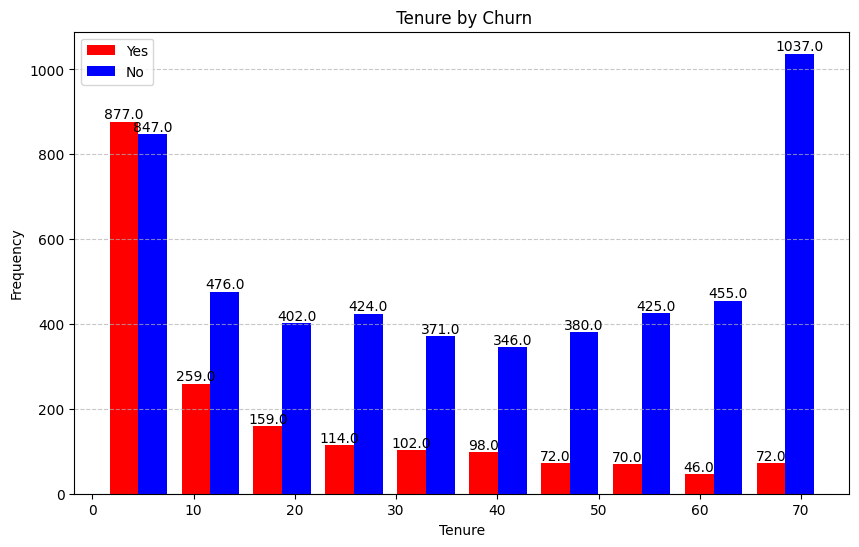

In [306]:
# make plot for tenure
churned = data[data['Churn'] == 'Yes']
not_churned = data[data['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')



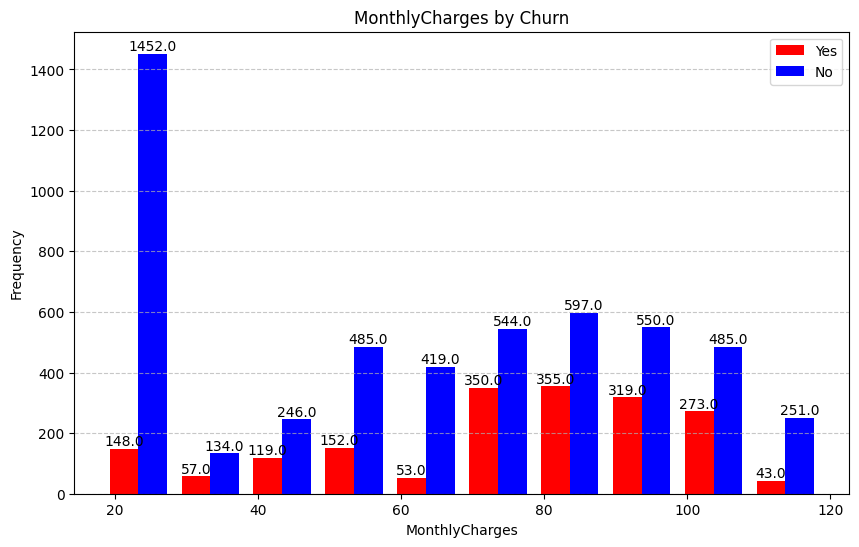

In [307]:
# make plot for MonthlyCharges
churned = data[data['Churn'] == 'Yes']
not_churned = data[data['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

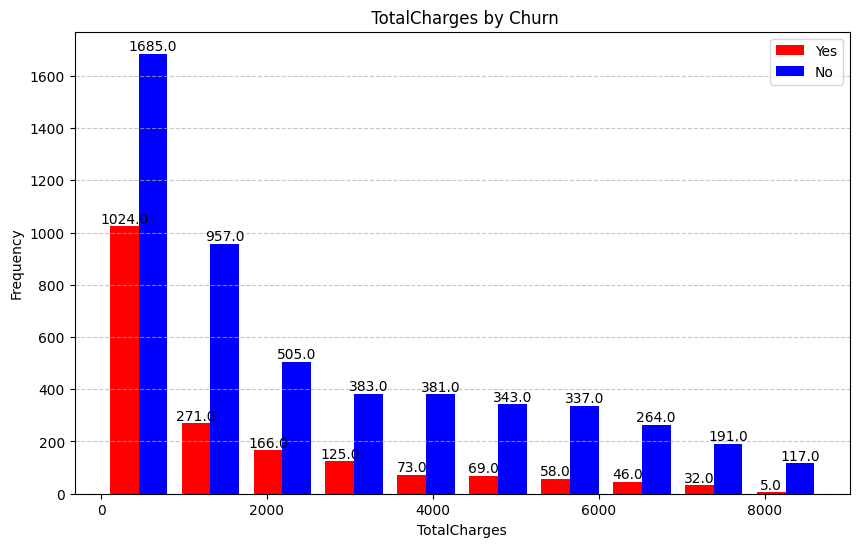

In [308]:
# make plot for totalcharges
churned = data[data['Churn'] == 'Yes']
not_churned = data[data['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')



In [309]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

New customers are more likely to churn

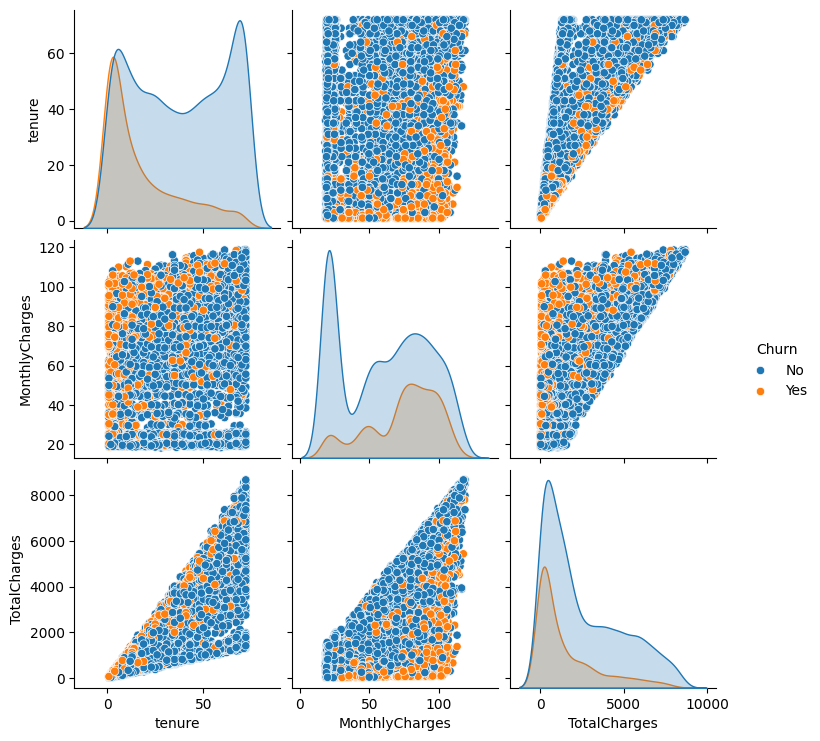

In [310]:
# Pair plot for 'tenure', 'MonthlyCharges', 'TotalCharges'
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

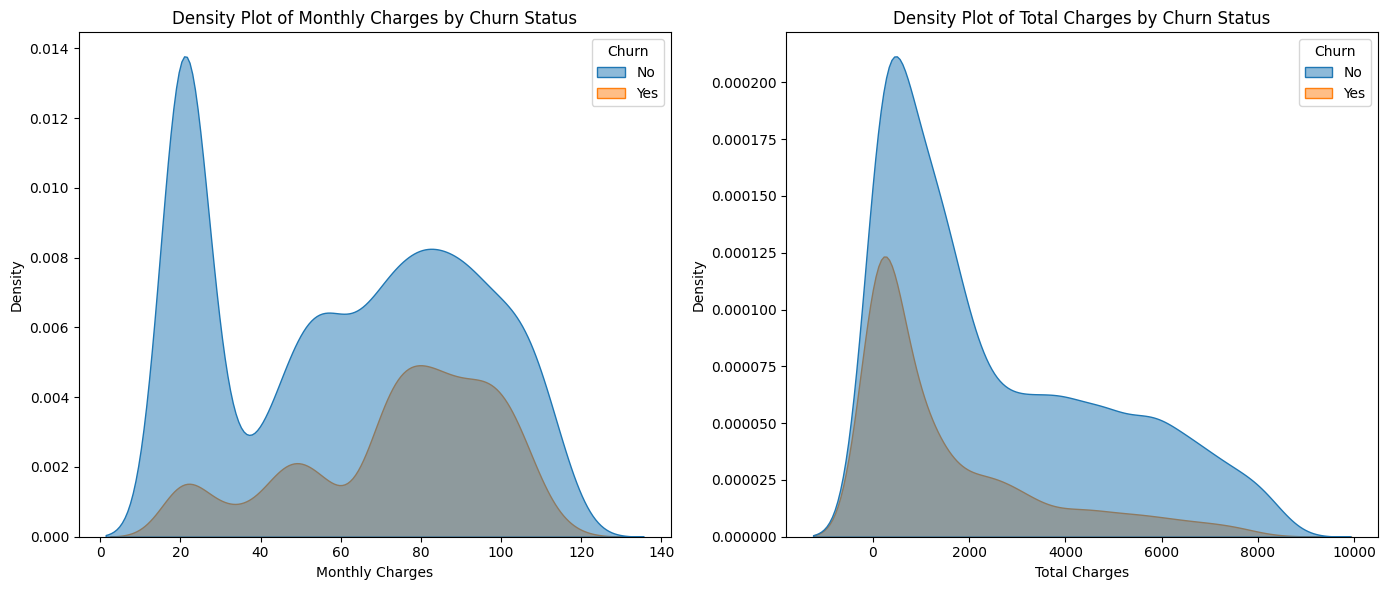

In [311]:
 #Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Monthly Charges
sns.kdeplot(data=data, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=data, x="TotalCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')


plt.tight_layout()
plt.show()

Customer with higher monthly charge are more likely to churn.

In [312]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()





    26.6 % of customers switched to another firm.
    Customers are 49.5 % female and 50.5 % male.



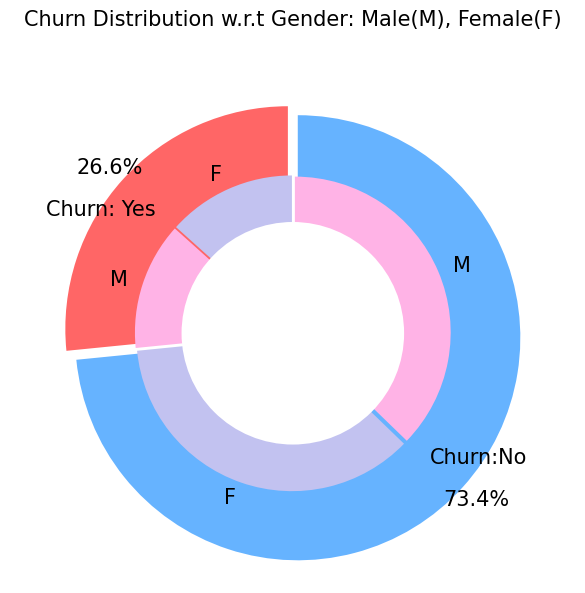

In [313]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)
# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [314]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



    It can be observed that the fraction of senior citizen is very less.
    Most of the senior citizens churn.



In [315]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Most customers churn in the absence of online security.

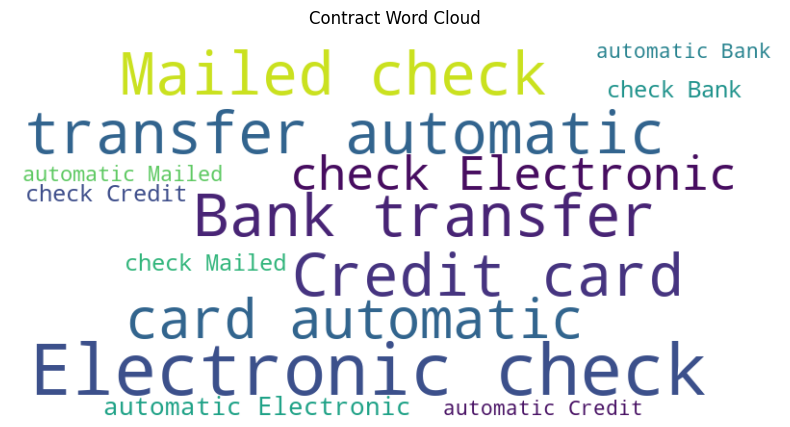

In [316]:
text = ' '.join(data['PaymentMethod'].dropna().astype(str))

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Contract Word Cloud')
plt.show()

## CHECKING THE SKEWNESS OF THE DATA

In [317]:
churn_frequency = data['Churn'].value_counts()
print(churn_frequency)


Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [318]:
data['Churn_numeric'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Calculate skewness and kurtosis
skewness = data['Churn_numeric'].skew()
kurtosis = data['Churn_numeric'].kurt()

print("Skewness: %s" % skewness)
print("Kurtosis: %s" % kurtosis)


Skewness: 1.0606217688543471
Kurtosis: -0.8753305006878693


Skewness (1.06):

Positive skewness in telecom customer churn data could suggest that there are more customers with a lower likelihood of churning, while a smaller number of customers may have a higher likelihood of churn.
This might indicate that the majority of customers are relatively stable and less likely to churn, while a smaller segment of customers might be more prone to churn, potentially requiring targeted retention strategies.


Kurtosis (-0.88):

The negative kurtosis suggests that the distribution of churn likelihood might be slightly flatter than a normal distribution.
This could mean that there's less variability in churn likelihood compared to a normal distribution. In other words, the dataset might have fewer extreme values (either very high or very low churn likelihood) than would be expected in a normal distribution.
However, it's worth noting that the negative kurtosis value is relatively close to zero, indicating that the distribution is not excessively flat or peaked.

## DETECTING AND REMOVING THE OUTLIERS

In [319]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [320]:
# Detecting and dropping outliers
Outliers_IQR = IQR_method(data,1,numeric_columns)
df_out = data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


In [321]:
# Checking results
print ('The amount of frauds in data before dropping outliers: ', len(df[df['Churn'] == 1]))
print ('The amount of frauds in data after dropping outliers: ', len(df_out[df_out['Churn'] == 1]))

The amount of frauds in data before dropping outliers:  0
The amount of frauds in data after dropping outliers:  0


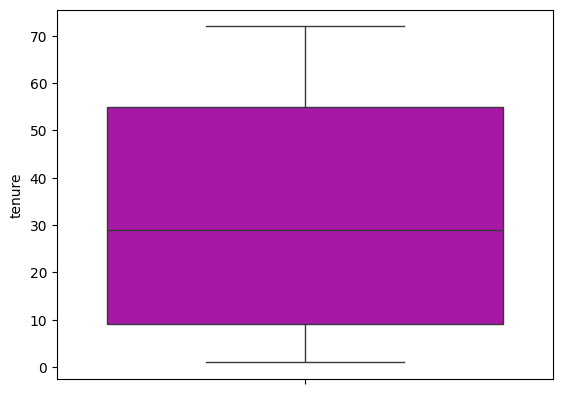

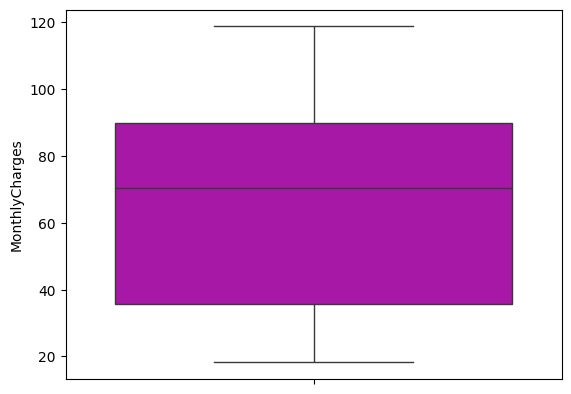

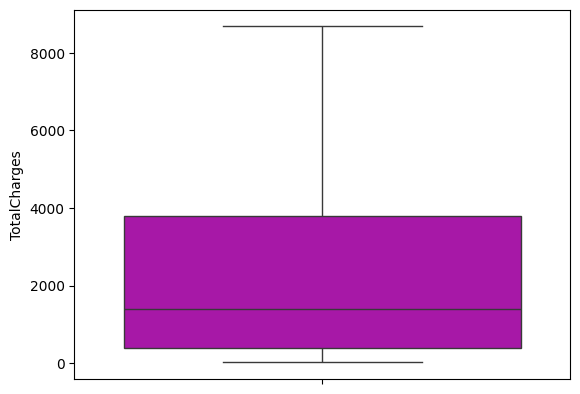

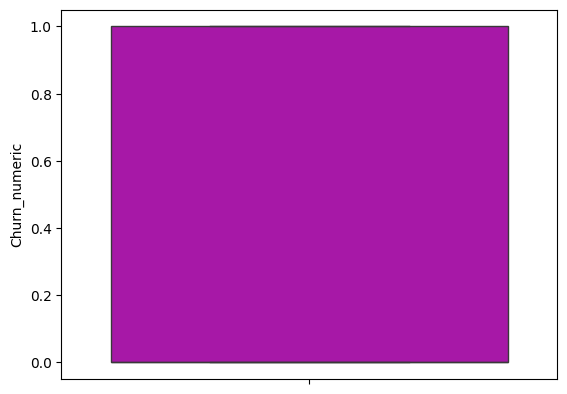

In [322]:
numeric_col = data.select_dtypes("number").columns[1:]

for i in numeric_col:
    sns.boxplot(data[i],color="m")
    plt.show()

In [323]:
data.to_csv("Cleaned.csv")

We do not have any outliers.

## DATA PREPROCESSING

Splitting the data into train and test sets¶

In [324]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [325]:
data = data.apply(lambda x: object_to_int(x))
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              1                0               0             2  ...   
1              0                0               2             0  ...   
2              0                0               2             2  ...   
3              1                0               2             0  ...   
4              0                1               0             0  ...   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0                 1   
1            0            0                0         1                 0   
2            0            0                0         0                 1   
3            2            0                0         1                 0   
4            0            0                0         0                 1   

   PaymentMethod  MonthlyCharges  TotalCharges  Churn  Churn_numeric  
0              2           29.85         29.85      0              0  
1              3           56.95       1889.50      0              0  
2              3           53.85        108.15      1              1  
3              0           42.30       1840.75      0              0  
4              2           70.70        151.65      1              1  

[5 rows x 21 columns]

In [326]:
plt.figure(figsize=(14,7))
data.drop("Churn_numeric", axis=1, inplace=True)
data.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

## CHECKING THE CORRELATION

In [327]:
num_data = data.select_dtypes(include=[np.number])

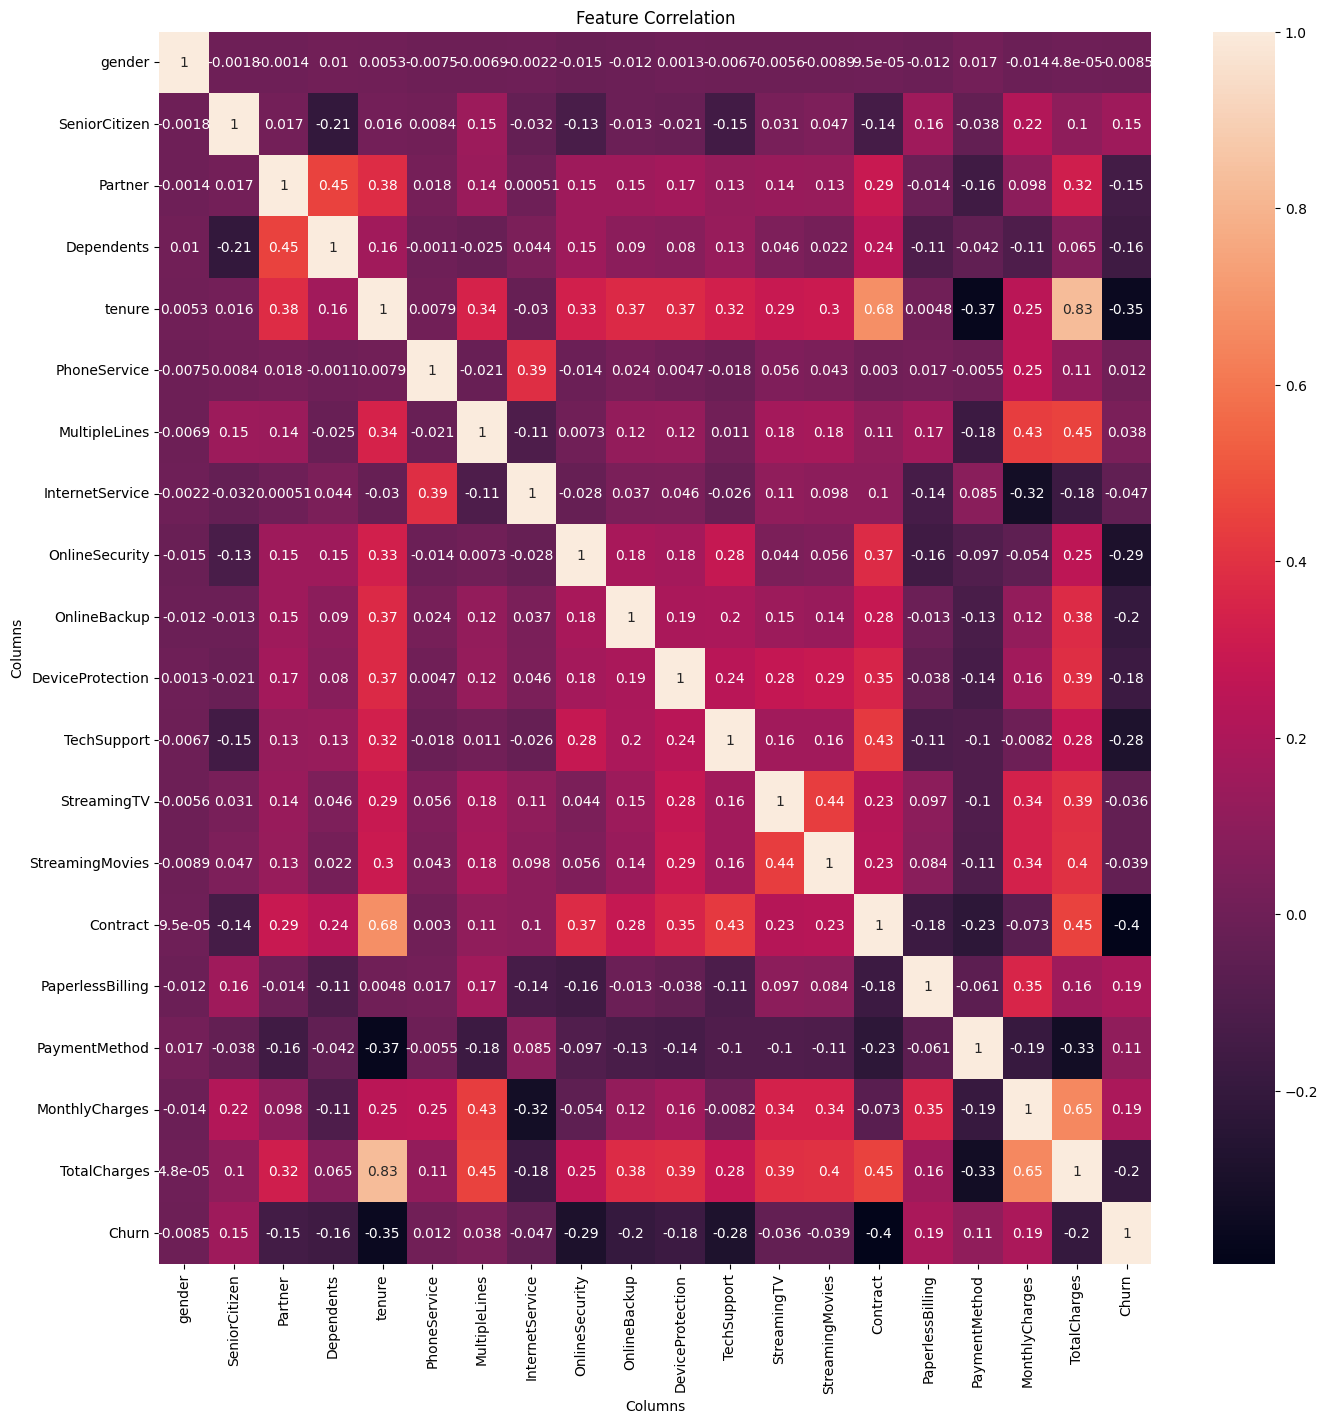

In [328]:
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(num_data.corr(), annot=True, ax=ax).set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

the "Churn" feature does not appear to have strong correlations with any of the other features. The highest correlation is between "Churn" and "Contract-05" (0.34), indicating that there may be a weak positive relationship between having a contract type of "05" and a higher likelihood of churning. However, this correlation is still relatively weak, and it's important to keep in mind that correlation does not imply causation.

Additionally, there are some negative correlations between "Churn" and other features, such as "Senior Citizen" (-0.28) and "Monthly Charges" (-0.22), suggesting that being a senior citizen or having higher monthly charges may be associated with a lower likelihood of churning. However, these correlations are also relatively weak.

Overall, the correlation matrix suggests that there are no strong relationships between the "Churn" feature and the other features in the dataset. This may indicate that predicting churn is a complex task that requires considering a variety of factors, rather than relying on a single strong correlaturn.

In [329]:
threshold = 0.6 

#Dataframe stacking
corr = data.describe().corr()
stacked = corr.stack().reset_index()
stacked.columns = ["feature1","feature2","cor"]

#Filtering correlation values
stacked = stacked.loc[(stacked.feature1 != stacked.feature2) & (stacked.cor >= threshold)]
stacked = stacked.reset_index()
stacked

index feature1          feature2       cor
0        1   gender     SeniorCitizen  1.000000
1        2   gender           Partner  1.000000
2        3   gender        Dependents  1.000000
3        4   gender            tenure  0.999958
4        5   gender      PhoneService  1.000000
..     ...      ...               ...       ...
337    393    Churn   StreamingMovies  1.000000
338    394    Churn          Contract  1.000000
339    395    Churn  PaperlessBilling  1.000000
340    396    Churn     PaymentMethod  1.000000
341    397    Churn    MonthlyCharges  0.999911

[342 rows x 4 columns]

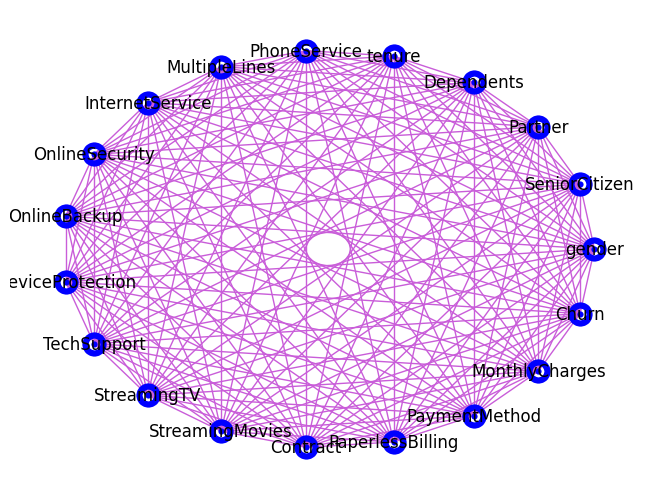

In [330]:
import networkx as nx
network_graph = nx.from_pandas_edgelist(stacked,"feature1","feature2")
nx.draw_circular(network_graph,with_labels=True,node_color="blue",node_size=20,edge_color="#C95DD9",linewidths=13)

Text(0.5, 1.0, 'Correlation')

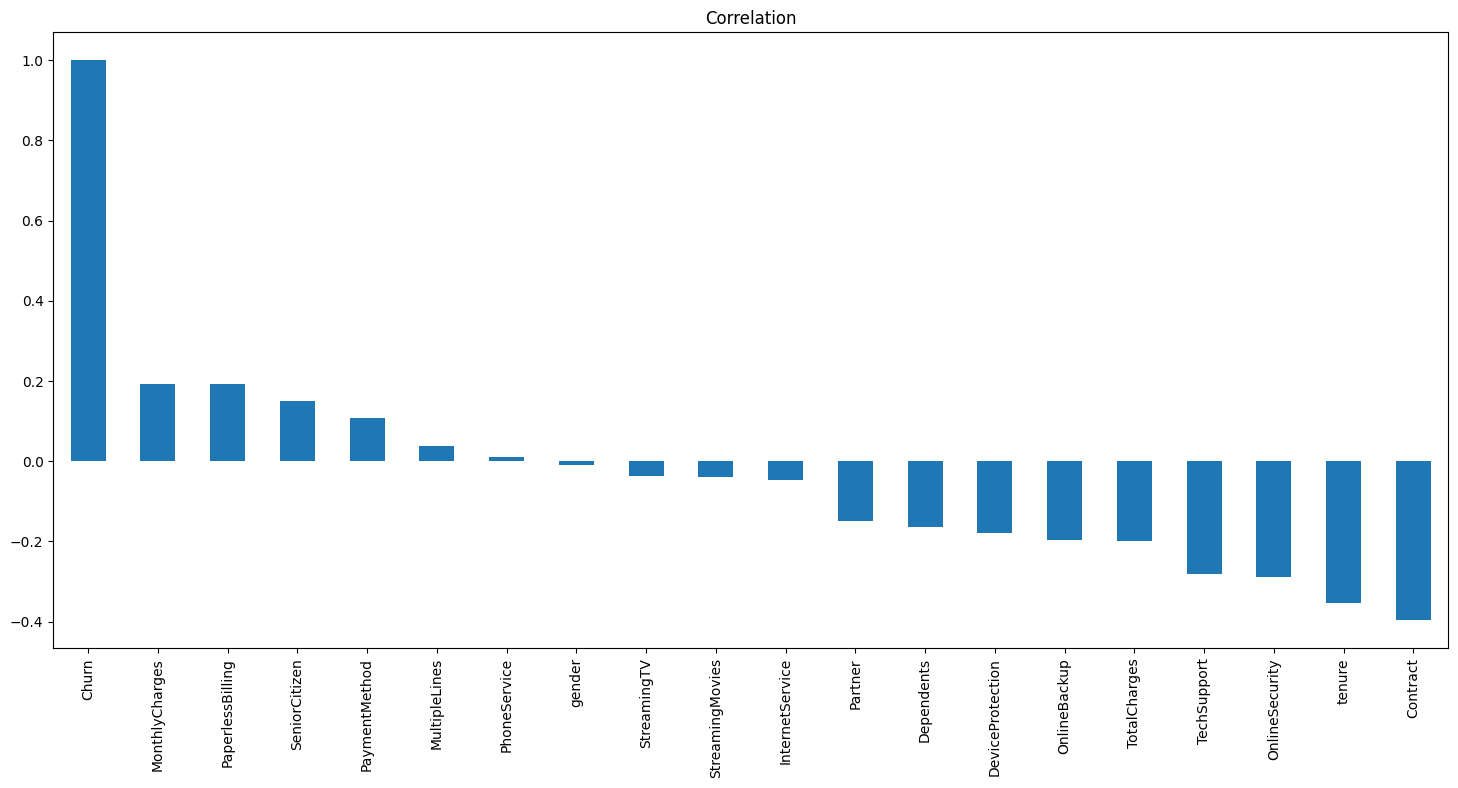

In [331]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(18,8))
data.corr()['Churn'].sort_values(ascending = False)[:20].plot(kind='bar')
plt.title('Correlation')

In [332]:
X = data.drop(columns = ['Churn'])
y = data['Churn'].values

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [334]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

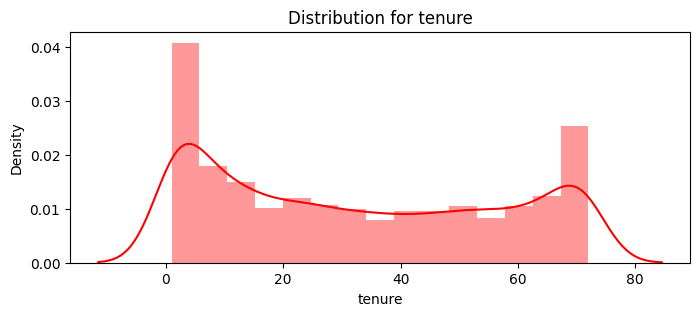

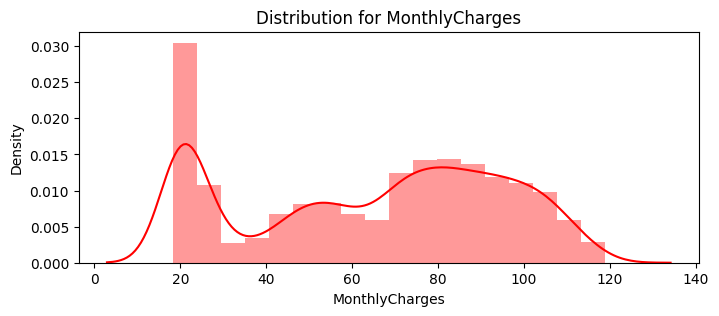

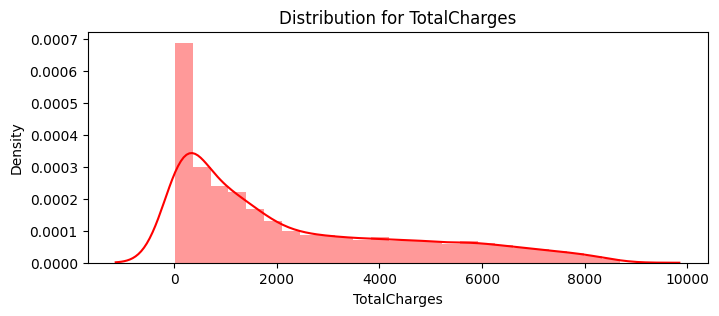

In [335]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, data)



Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.


## STANDARDIZING NUMERIC ATTRIBUTES

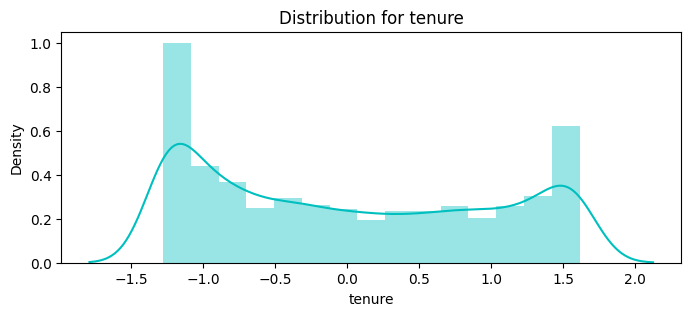

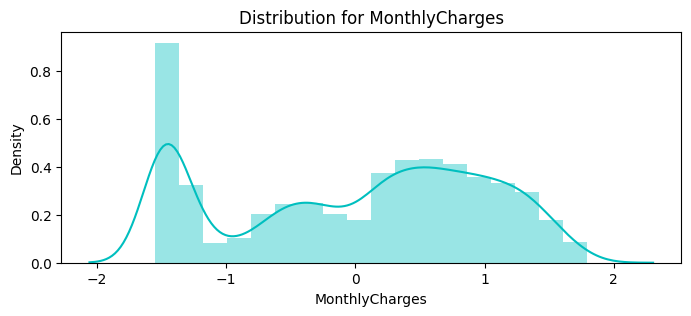

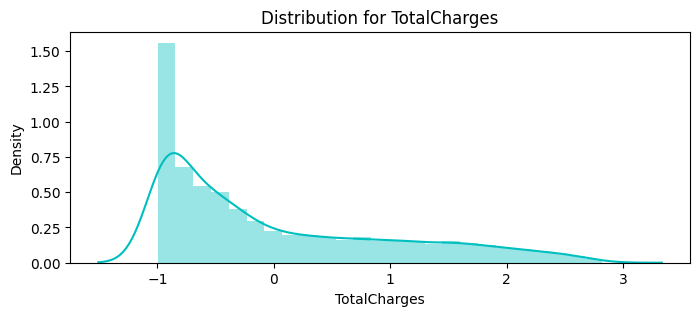

In [336]:
data_std = pd.DataFrame(StandardScaler().fit_transform(data[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, data_std, color='c')

In [337]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [338]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## IMBALANCE DATA HANDLING (USING SMOTE)

 Synthetic Minority Over-sampling Technique

In [339]:
X = data.drop('Churn', axis=1)
y = data['Churn']


In [340]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [341]:
print("Before SMOTE:")
print(y.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_resampled).value_counts())


Before SMOTE:
Churn
0    5163
1    1869
Name: count, dtype: int64

After SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


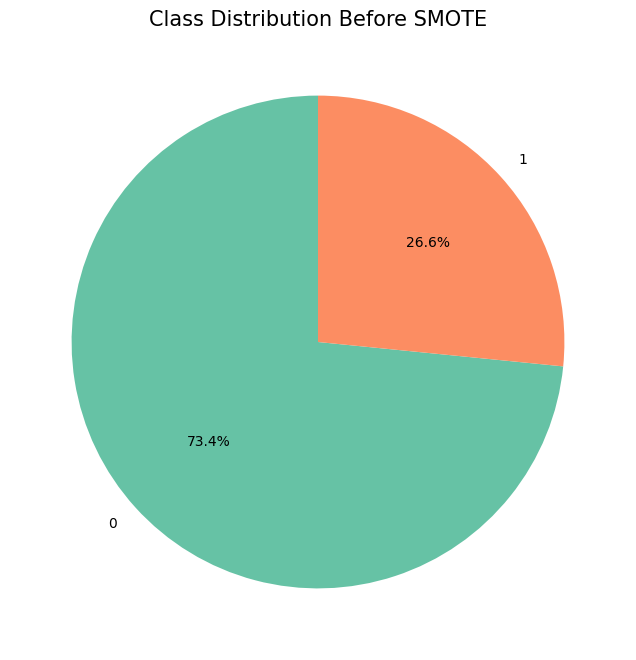

In [342]:
plt.figure(figsize=(8, 8))
y.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Class Distribution Before SMOTE', fontsize=15)
plt.ylabel('')
plt.show()

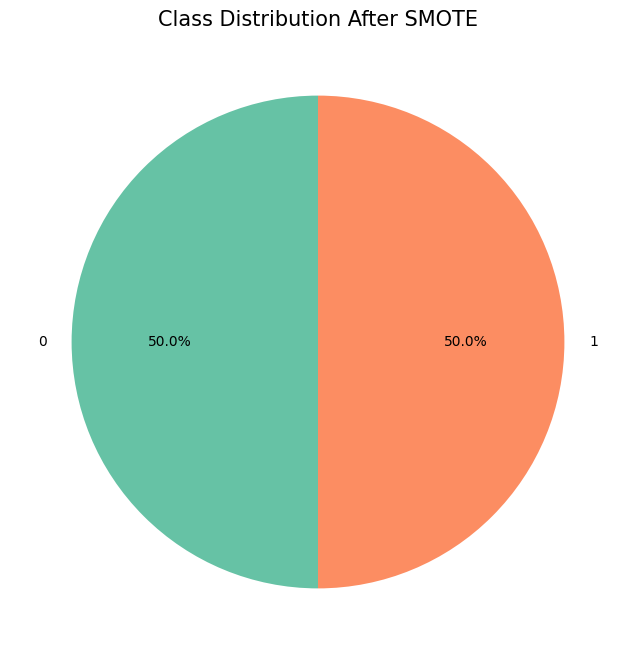

In [343]:
plt.figure(figsize=(8, 8))
pd.Series(y_resampled).value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Class Distribution After SMOTE', fontsize=15)
plt.ylabel('')
plt.show()


In [344]:
data.to_csv("label.csv")

## MODELLING

## LINEAR REGRESSION

In [345]:
#LINEAR REGRESSION
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [346]:
X = data.drop('Churn', axis=1)  # Features
y = data['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [347]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [348]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

0.21316974464242566
[-4.53234744e-03  6.02065883e-02  1.01138348e-02 -3.22951110e-02
 -1.64806893e-03 -1.35563498e-01  1.47880598e-02  5.27245644e-02
 -4.55208622e-02 -2.07974038e-02 -1.47580210e-02 -4.50281085e-02
  1.47449620e-03  2.41842574e-03 -4.46404691e-02  4.19509857e-02
  7.50695033e-03  5.86552987e-03 -5.23923327e-05]


In [349]:
# Predicting the test set results
y_pred = linreg.predict(X_test)

In [350]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the Mean Squared Error
print(f"Mean Squared Error (MSE): {mse}")
print("R^2 Score:", r2)


Mean Squared Error (MSE): 0.14690646707359667
R^2 Score: 0.24723886961350694


In [351]:
# Convert predictions to 0 or 1 based on a threshold
y_pred_labels = np.where(y_pred > 0.5, 1, 0)

In [352]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test data
y_pred = linreg.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Absolute Error (MAE): {round(mae, 2)}")
print(f"Mean Squared Error (MSE): {round(mse, 2)}")
print(f"R-squared (R²): {round(r2, 2)}")


Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 0.15
R-squared (R²): 0.25


In [353]:
# In linear regression model, y_pred will be continuous.For creating a confusion matrix, you need categorical predictions (e.g., 0 or 1). You must 
#threshold these predictions to convert them into binary labels

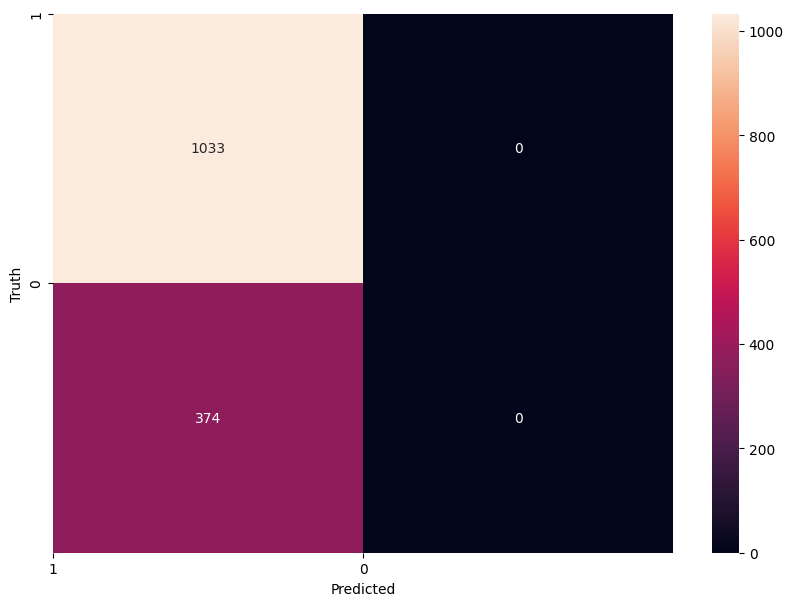

In [354]:
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are defined somewhere in your code
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Interchange the position of 0 and 1 for both x and y labels
plt.xticks(ticks=[0, 1], labels=['1', '0'])  
plt.yticks(ticks=[0, 1], labels=['1', '0'])

plt.show()


In [355]:
#least absolute shrinkacle and selection operator

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Split data into features (X) and target variable (y)
# Assuming X_train, X_test, y_train, y_test are already prepared

# Initialize Lasso Regression model
lasso_model = Lasso(alpha=1.0)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
lasso_predictions = lasso_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lasso_predictions)

# Print the Mean Squared Error
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.15595653428403206


In [357]:
print (lasso_model.coef_)

[-0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.37276286e-03 -9.34760926e-05]


In [358]:
#ridge meand the path with constraint maximum

In [359]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Split data into features (X) and target variable (y)
# Assuming X_train, X_test, y_train, y_test are already prepared

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
ridge_predictions = ridge_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, ridge_predictions)

# Print the Mean Squared Error
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.14690488311951988


In [360]:
print (ridge_model.coef_)

[-4.52827817e-03  6.01574907e-02  1.00938136e-02 -3.22792906e-02
 -1.64811351e-03 -1.35096773e-01  1.48128109e-02  5.25923594e-02
 -4.55221366e-02 -2.07880045e-02 -1.47468859e-02 -4.50313595e-02
  1.49599194e-03  2.44040956e-03 -4.46424273e-02  4.19369106e-02
  7.50525319e-03  5.86289758e-03 -5.23952774e-05]


## LOGISTIC REGRESSION

In [361]:
from sklearn.linear_model import LogisticRegressionCV

In [362]:
#Split Data into Training and Testing Sets:

In [363]:
X = data.drop('Churn', axis=1)  # Features
y = data['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [364]:
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)

LogisticRegression()

In [365]:
predictions = logistic_reg_model.predict(X_test)

In [366]:
model_scores = []
ACC = accuracy_score(y_test,predictions)
model_scores.append({'Model': 'Logistic Regression', 'Accuracy': ACC})

In [367]:
print(ACC)

0.7846481876332623


In [368]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.53      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [369]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[907, 126],
       [177, 197]], dtype=int64)

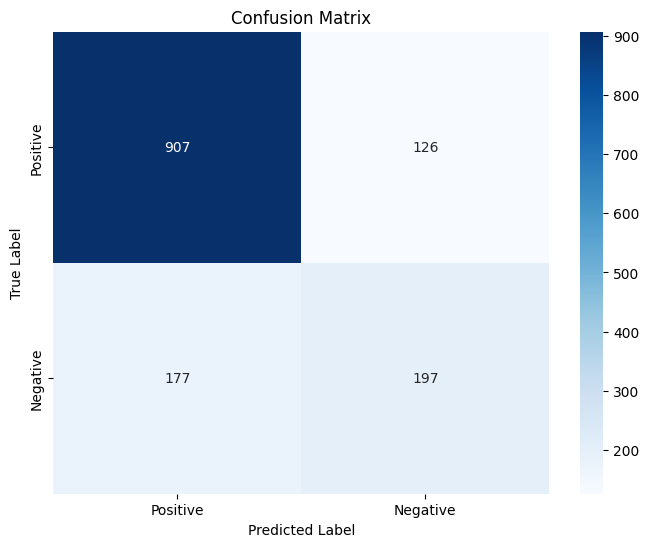

In [370]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Positive', 'Negative'], 
            yticklabels=['Positive', 'Negative'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [371]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Assuming you have loaded and preprocessed your dataset, and have X and y ready

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resample, y_resample = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

# Train logistic regression model on the resampled data
model_lr_smote = LogisticRegression(solver='lbfgs', max_iter=1000)
model_lr_smote.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model_lr_smote.predict(X_test)

# Calculate accuracy
lr_smote_accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression accuracy with SMOTE:", lr_smote_accuracy)
model_scores.append({'Model': 'Logistic Regression using smote', 'Accuracy': lr_smote_accuracy})

# Calculate precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, predictions))

Logistic Regression accuracy with SMOTE: 0.8078412391093901
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1037
           1       0.78      0.85      0.81      1029

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



In [372]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have trained your Logistic Regression model and named it 'logreg_model'
logreg_model = LogisticRegression()

# Fit the model
logreg_model.fit(X_train, y_train)

# Get the coefficients
coefficients = logreg_model.coef_[0]

# Get the indices of the top 5 features
top_5_indices_logreg = np.argsort(np.abs(coefficients))[-5:]

# Getting the names of the top 5 features
top_5_features_logreg = X.columns[top_5_indices_logreg]

print("Top 5 Features for Logistic Regression:", top_5_features_logreg)


Top 5 Features for Logistic Regression: Index(['TechSupport', 'gender', 'Partner', 'Dependents', 'Contract'], dtype='object')


In [373]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[797 240]
 [157 872]]


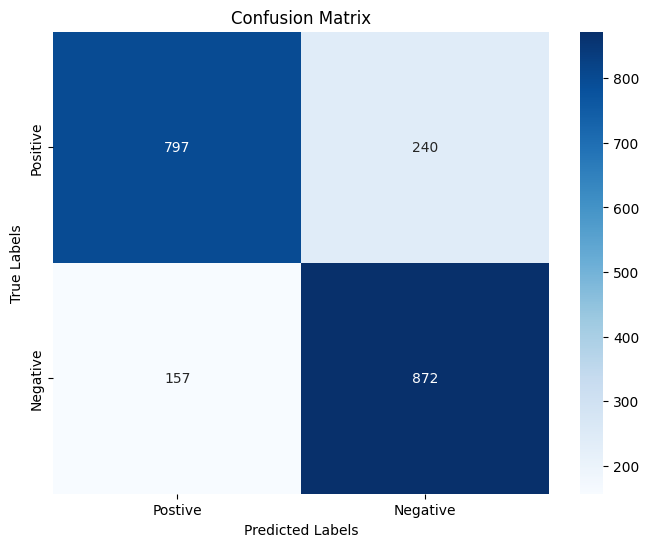

In [374]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, 
            yticklabels=['Positive', 'Negative'], 
            xticklabels=['Postive', 'Negative'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [375]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into features (X) and target variable (y)
# Assuming X_train, X_test, y_train, y_test are already prepared

# Lasso Logistic Regression
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_accuracy = accuracy_score(y_test, lasso_predictions)
print("Lasso Logistic Regression Accuracy:", lasso_accuracy)
model_scores.append({'Model': 'Logistic Regression using lasso', 'Accuracy': lasso_accuracy})

Lasso Logistic Regression Accuracy: 0.8068731848983544


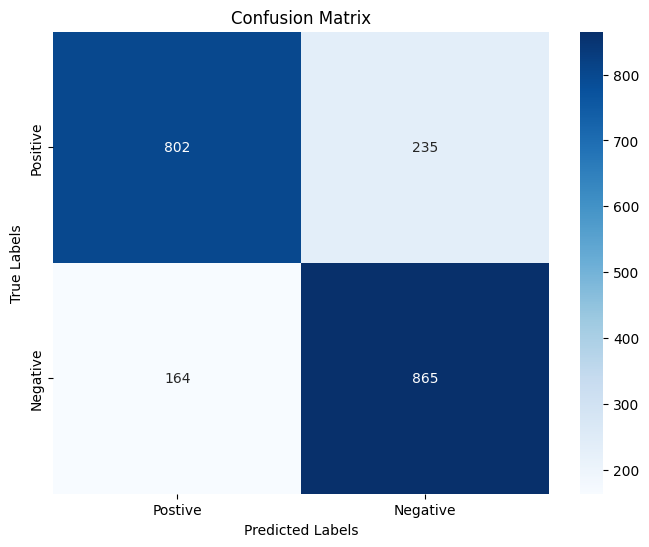

In [376]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test,  lasso_predictions)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, 
            yticklabels=['Positive', 'Negative'], 
            xticklabels=['Postive', 'Negative'])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

In [377]:
# Ridge Logistic Regression
ridge_model = LogisticRegression(penalty='l2', solver='lbfgs')
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_accuracy = accuracy_score(y_test, ridge_predictions)
print("Ridge Logistic Regression Accuracy:", ridge_accuracy)
model_scores.append({'Model': 'Logistic Regression using ridge', 'Accuracy': ridge_accuracy})

Ridge Logistic Regression Accuracy: 0.8000968054211036


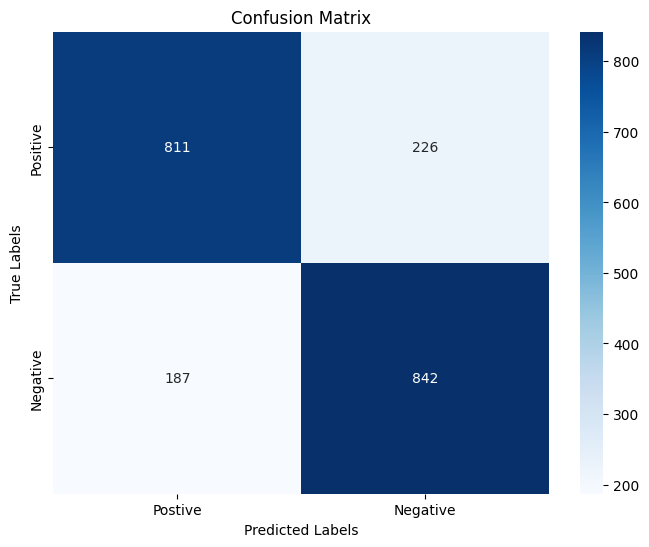

In [378]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test,  ridge_predictions)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, 
            yticklabels=['Positive', 'Negative'], 
            xticklabels=['Postive', 'Negative'])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

# APPLYING SVM

In [379]:
X = data.drop('Churn', axis=1)
y = data['Churn']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [380]:
# Initialize an empty list to store model scores
# model_scores = []

# Create model to evaluate
models = [

    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']})  # Add hyperparameters for SVM
]


In [381]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV



# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

In [382]:
  # Hyperparameter tuning using GridSearchCV
if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

In [383]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [384]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Append model name and accuracy to the list
model_scores.append({'Model': name, 'Accuracy': accuracy})

# Convert the list to a DataFrame
scores_df = pd.DataFrame(model_scores)
# Print the performance metrics
print("Model:", name)
    
print("Test Accuracy:", round(accuracy, 3), "%")
print()

Model: Support Vector Machine
Test Accuracy: 0.757 %



In [385]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train your model on X_train, y_train and predict on X_test
y_pred = pipeline.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.7521777777777777
Test Accuracy: 0.7569296375266524


In [386]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

Cross-Validation Scores: [0.74044444 0.72355556 0.73866667 0.71911111 0.74222222]
Mean CV Score: 0.7328


In [387]:
from sklearn.metrics import classification_report

# Train the SVM model
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       990
           1       0.56      0.81      0.66       417

    accuracy                           0.76      1407
   macro avg       0.73      0.77      0.74      1407
weighted avg       0.80      0.76      0.77      1407



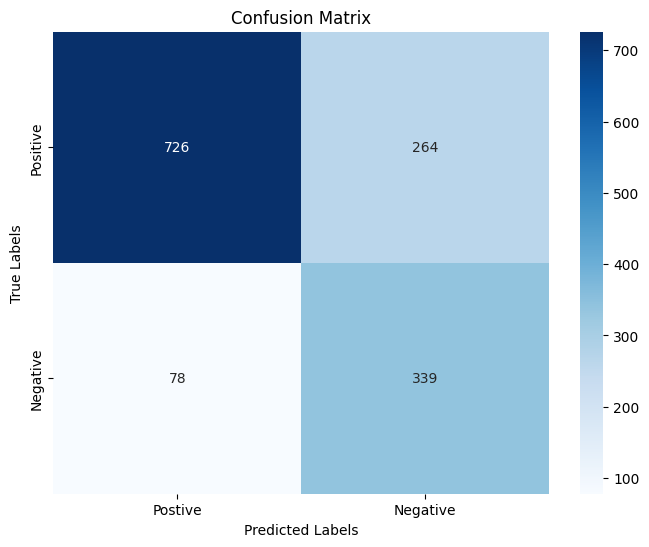

In [388]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, 
            yticklabels=['Positive', 'Negative'], 
            xticklabels=['Postive', 'Negative'])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()


# APPLYING SVM USING SMOTE

In [389]:
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
#model_scores = []

# Create a list of models to evaluate
models = [
   
    ('Support Vector Machine using Smote', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']})  # Add hyperparameters for SVM
]

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
         ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])
    
     # Hyperparameter tuning using GridSearchCV for other models
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)
     # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3), "%")

    print()

Model: Support Vector Machine using Smote
Test Accuracy: 0.967 %



In [390]:
from sklearn.svm import SVC
import numpy as np

# Assuming you have trained your SVM model with GridSearchCV and named it 'grid_search'
best_estimator = grid_search.best_estimator_

# Check if the model is a linear SVM (SVC with linear kernel)
if isinstance(best_estimator, SVC) and best_estimator.kernel == 'linear':
    # Get the support vectors and dual coefficients
    support_vectors = best_estimator.support_vectors_
    dual_coef = best_estimator.dual_coef_

    # Calculate the coefficients
    coef = np.dot(dual_coef, support_vectors)

    # Calculate the absolute values
    abs_coef = np.abs(coef)
    
    # Finding the indices of the top 5 features
    top_5_indices = np.argsort(abs_coef[0])[-5:]
    
    # Getting the names of the top 5 features
    top_5_features = X.columns[top_5_indices]
    
    print("Top 5 Features:", top_5_features)
else:
    print("The model is not a linear SVM with a linear kernel. Cannot extract coefficients.")


The model is not a linear SVM with a linear kernel. Cannot extract coefficients.


In [391]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Train your model on X_train, y_train and predict on X_test
yr_pred = pipeline.predict(Xr_test)

test_accuracy = accuracy_score(yr_test, yr_pred)
train_accuracy = accuracy_score(yr_train, pipeline.predict(Xr_train))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.9972079037800687
Test Accuracy: 0.9665236051502146


In [392]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, Xr_train, yr_train, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

Cross-Validation Scores: [0.94098712 0.95166488 0.94092374 0.93233083 0.94522019]
Mean CV Score: 0.9422253518529615


In [393]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = pipeline.predict(Xr_test)

# Calculate mean squared error
mse = mean_squared_error(yr_test, y_pred)

# Calculate R-squared
r2 = r2_score(yr_test, y_pred)

# Print MSE and R2
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.03347639484978541
R-squared: 0.8641037758422665


A low MSE and a high R2 indicate that your model is making accurate predictions and capturing a significant portion of the variance in the target variable.

In [394]:
from sklearn.metrics import classification_report


# Train the pipeline on the training data
pipeline.fit(Xr_train, yr_train)

# Make predictions on the test data
y_pred = pipeline.predict(Xr_test)

# Generate classification report
report = classification_report(yr_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       512
           1       1.00      0.94      0.97       653

    accuracy                           0.97      1165
   macro avg       0.96      0.97      0.97      1165
weighted avg       0.97      0.97      0.97      1165



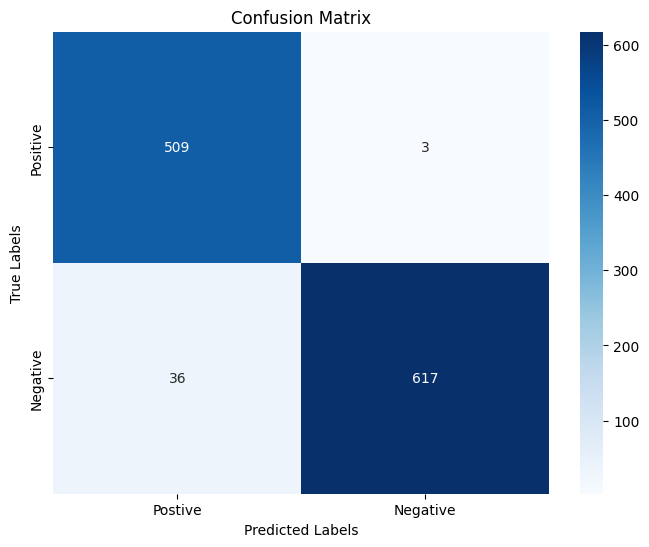

In [395]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(yr_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, 
            yticklabels=['Positive', 'Negative'], 
            xticklabels=['Postive', 'Negative'])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

## APPLYING DECISION TREES 

In [396]:
# split data into X and y
# X = data.drop('Churn', axis=1)
# y = data['Churn']

In [397]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Initialize an empty list to store model scores
# model_scores = []

# Create a list of models to evaluate
models = [
    ('Decision Tree', DecisionTreeClassifier(),
        {'model__criterion': ['gini', 'entropy'],
         'model__max_depth': [None, 10, 20, 30],
         'model__min_samples_split': [2, 5, 10]})
]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])
    
    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3), "%")
    print()


Model: Decision Tree
Test Accuracy: 0.765 %



In [398]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train your model on X_train, y_train and predict on X_test
y_pred = pipeline.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.8515555555555555
Test Accuracy: 0.7647476901208244


In [399]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

Cross-Validation Scores: [0.77955556 0.776      0.75733333 0.76444444 0.77066667]
Mean CV Score: 0.7696


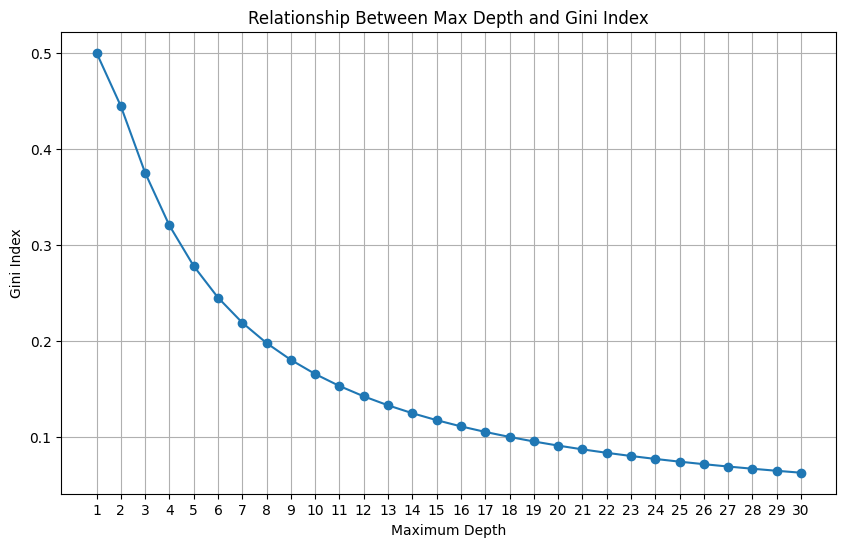

In [400]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of maximum depths
max_depths = np.arange(1, 31)  # Adjust the range as needed

# Calculate Gini index for each maximum depth
gini_values = [1 - ((i / (i + 1))**2 + ((1 / (i + 1))**2)) for i in max_depths]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(max_depths, gini_values, marker='o', linestyle='-')
plt.title('Relationship Between Max Depth and Gini Index')
plt.xlabel('Maximum Depth')
plt.ylabel('Gini Index')
plt.xticks(max_depths)
plt.grid(True)
plt.show()


gini index is decreasing with the max depth does the frequency of the randomness in the data is also decrerasing

In [401]:
y_pred = pipeline.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [402]:
from sklearn.metrics import classification_report


# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1033
           1       0.56      0.52      0.54       374

    accuracy                           0.76      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



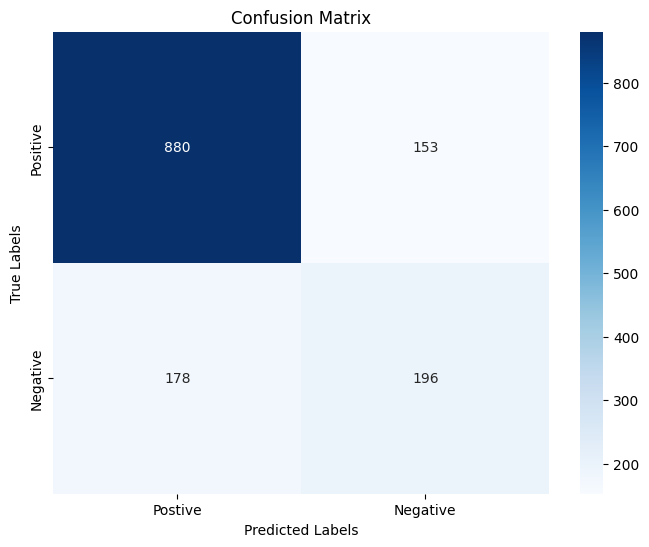

In [403]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, 
            yticklabels=['Positive', 'Negative'], 
            xticklabels=['Postive', 'Negative'])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()


## APPLYING DECISION TREES USING SMOTE

In [404]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
import pandas as pd

# # Resampling using SMOTEENN
# sm = SMOTEENN()
# X_res, y_res = sm.fit_resample(X, y)

# # Split the resampled data into training and testing sets
# Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores and best parameters
#model_scores = []
best_params_list = []

# Create a list of models to evaluate
models = [
    ('Decision Tree With Smote', DecisionTreeClassifier(),
     {'model__criterion': ['entropy','gini'],
      'model__max_depth': [None, 10, 20, 30],
      'model__min_samples_split': [2, 5, 10]})
]

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        
        # Get the best parameters
        best_params = grid_search.best_params_
        best_params_list.append({name: best_params})

        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)

    # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3), "%")
    print()

# Print the top five parameters for each model
for params in best_params_list:
    for model_name, params_dict in params.items():
        print(f"{model_name} - Best Parameters:")
        for param, value in params_dict.items():
            print(f"{param}: {value}")
        print("\n")
        
feature_importances = pipeline.named_steps['model'].feature_importances_

# Get the indices of the top five features
top_five_indices = feature_importances.argsort()[-5:][::-1]

# Get the names of the top five features
top_five_features = [X_res.columns[i] for i in top_five_indices]

print("Top five features:", top_five_features)

Model: Decision Tree With Smote
Test Accuracy: 0.935 %

Decision Tree With Smote - Best Parameters:
model__criterion: entropy
model__max_depth: 10
model__min_samples_split: 2


Top five features: ['Contract', 'MonthlyCharges', 'tenure', 'TotalCharges', 'InternetService']


In [405]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Train your model on X_train, y_train and predict on X_test
yr_pred = pipeline.predict(Xr_test)

test_accuracy = accuracy_score(yr_test, yr_pred)
train_accuracy = accuracy_score(yr_train, pipeline.predict(Xr_train))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.9828178694158075
Test Accuracy: 0.934763948497854


In [406]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, Xr_train, yr_train, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

Cross-Validation Scores: [0.94098712 0.92481203 0.91944146 0.94199785 0.93447905]
Mean CV Score: 0.9323435043771292


In [407]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = pipeline.predict(Xr_test)

# Calculate mean squared error
mse = mean_squared_error(yr_test, y_pred)

# Calculate R-squared
r2 = r2_score(yr_test, y_pred)

# Print MSE and R2
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.06523605150214593
R-squared: 0.7351765888208269


In [408]:
from sklearn.metrics import classification_report


# Train the pipeline on the training data
pipeline.fit(Xr_train, yr_train)

# Make predictions on the test data
y_pred = pipeline.predict(Xr_test)

# Generate classification report
report = classification_report(yr_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       512
           1       0.94      0.95      0.94       653

    accuracy                           0.94      1165
   macro avg       0.94      0.94      0.94      1165
weighted avg       0.94      0.94      0.94      1165



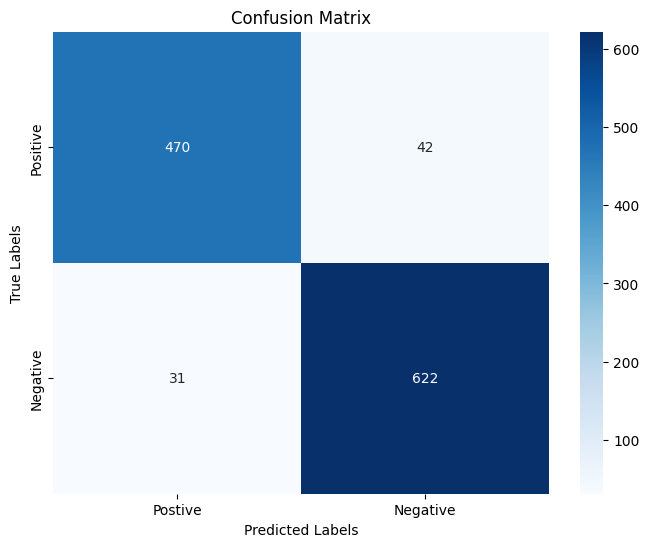

In [409]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(yr_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, 
            yticklabels=['Positive', 'Negative'], 
            xticklabels=['Postive', 'Negative'])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

In [410]:
from sklearn.tree import export_graphviz

# Assuming grid_search.best_estimator_ contains the best pipeline
best_pipeline = grid_search.best_estimator_
best_model = best_pipeline.named_steps['model']

# Create a Graphviz file
export_graphviz(best_model, out_file='tree_churn.dot', feature_names=X_res.columns.tolist())

# At the command line, run this to convert to PNG:
# dot -Tpng tree_churn.dot -o tree_churn.png


## APPYLING RANDOM FOREST

In [411]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.pipeline import Pipeline

# Initialize an empty list to store model scores
# model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(),
        {'model__n_estimators': [50, 100, 150],
         'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]})
]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])
    
    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3), "%")
    print()


Model: Random Forest
Test Accuracy: 0.794 %



In [412]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train your model on X_train, y_train and predict on X_test
y_pred = pipeline.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.9038222222222222
Test Accuracy: 0.7938877043354655


In [413]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

Cross-Validation Scores: [0.80622222 0.80266667 0.79822222 0.79733333 0.81066667]
Mean CV Score: 0.8030222222222221


In [414]:
from sklearn.metrics import classification_report


# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



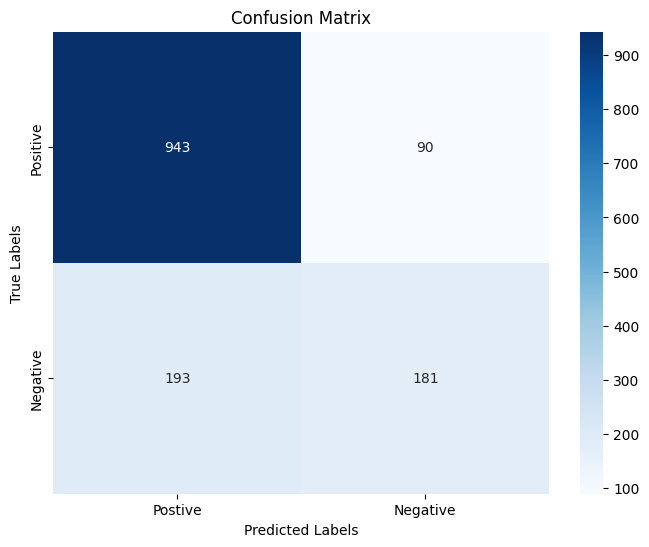

In [415]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, 
            yticklabels=['Positive', 'Negative'], 
            xticklabels=['Postive', 'Negative'])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()


## APPYING RANDOM FOREST USING SMOTE

In [416]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
import pandas as pd

# Resampling using SMOTEENN
# sm = SMOTEENN()
# X_res, y_res = sm.fit_resample(X, y)

# # Split the resampled data into training and testing sets
# Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
# model_scores = []

# Create a list of models to evaluate

# Create a list of models to evaluate
models = [
    ('Random Forest using Smote', RandomForestClassifier(),
     {'model__n_estimators': [50, 100, 150],
      'model__max_depth': [None, 10, 20],
      'model__min_samples_split': [2, 5, 10]})
]

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)

    # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Save the trained model using pickle
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3), "%")
    print()




Model: Random Forest using Smote
Test Accuracy: 0.955 %



In [422]:
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Load your dataset into 'data' variable
# data = pd.read_csv('your_dataset.csv')

# Select only the required features
input_data = ['OnlineSecurity', 'Contract', 'TotalCharges', 'tenure', 'MonthlyCharges']
data_subset = data[input_data]

# Separate features (X) and target variable (y)
X = data_subset
y = data['Churn']  # Replace 'target_column' with the actual name of your target column
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Preprocess the input data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_res)

# Train the model
model = RandomForestClassifier()  # You can adjust parameters as needed
model.fit(X_scaled, y_res)

# Save the trained model using pickle
# Save the trained model and scaler using pickle
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump({"model": model, "scaler": scaler}, f)

# Now, for making predictions:

# Load the trained model
with open('random_forest_model.pkl', 'rb') as f:
    model_and_scaler = pickle.load(f)

# Extract the model and scaler from the dictionary
model = model_and_scaler["model"]
scaler = model_and_scaler["scaler"]

# Preprocess the input data to match the format expected by the model
input_data_subset_scaled = scaler.transform(data_subset)

# Make predictions using the loaded model
predictions = model.predict(input_data_subset_scaled)

# Print the predictions
print("Predictions:", predictions)


Predictions: [1 0 1 ... 0 1 0]


In [418]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming you have trained your Random Forest model and named it 'rf_model'
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(Xr_train, yr_train)

# Get feature importances
importances = rf_model.feature_importances_

# Get the indices of the top 5 features
top_5_indices_rf = np.argsort(importances)[-5:]

# Getting the names of the top 5 features
top_5_features_rf = X.columns[top_5_indices_rf]

print("Top 5 Features for Random Forest:", top_5_features_rf)


IndexError: index 8 is out of bounds for axis 0 with size 5

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Train your model on X_train, y_train and predict on X_test
yr_pred = pipeline.predict(Xr_test)

test_accuracy = accuracy_score(yr_test, yr_pred)
train_accuracy = accuracy_score(yr_train, pipeline.predict(Xr_train))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 1.0
Test Accuracy: 0.9456706281833617


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, Xr_train, yr_train, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

Cross-Validation Scores: [0.9447983  0.94267516 0.9522293  0.96072187 0.94904459]
Mean CV Score: 0.9498938428874734


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = pipeline.predict(Xr_test)

# Calculate mean squared error
mse = mean_squared_error(yr_test, y_pred)

# Calculate R-squared
r2 = r2_score(yr_test, y_pred)

# Print MSE and R2
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.05432937181663837
R-squared: 0.780003268202722


In [ ]:
from sklearn.metrics import classification_report


# Train the pipeline on the training data
pipeline.fit(Xr_train, yr_train)

# Make predictions on the test data
y_pred = pipeline.predict(Xr_test)

# Generate classification report
report = classification_report(yr_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.95      0.96      0.95       654

    accuracy                           0.95      1178
   macro avg       0.95      0.95      0.95      1178
weighted avg       0.95      0.95      0.95      1178



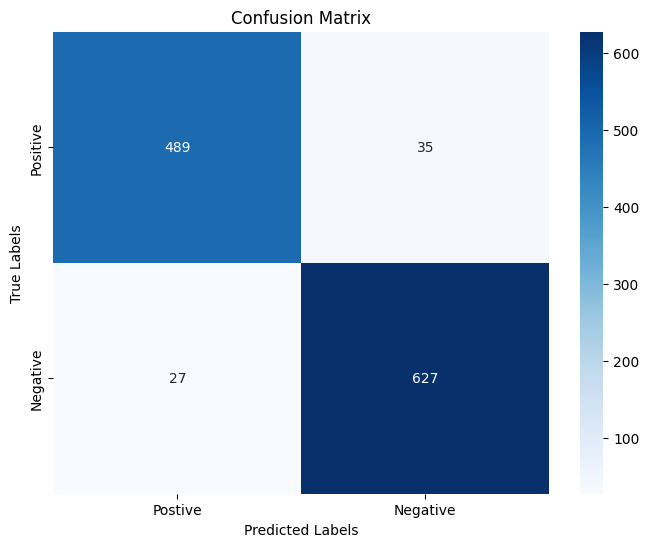

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Compute confusion matrix
conf_matrix = confusion_matrix(yr_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, 
            yticklabels=['Positive', 'Negative'], 
            xticklabels=['Postive', 'Negative'])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

# APPLYING XG BOOST

Extreme Gradient Boost

In [ ]:
# split data into X and y
# X = data.drop('Churn', axis=1)
# y = data['Churn']
# # data into train and split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from xgboost import XGBClassifier


# Initialize an empty list to store model scores
# model_scores = []

# Create a list of models to evaluate
models = [
  
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]})  # Add hyperparameters for XG Boost
]


# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3), "%")
    print()


Model: XG Boost
Test Accuracy: 0.789 %



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Train your model on X_train, y_train and predict on X_test
y_pred = pipeline.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.8481777777777778
Test Accuracy: 0.7889125799573561


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

Cross-Validation Scores: [0.79466667 0.80444444 0.79022222 0.79466667 0.80977778]
Mean CV Score: 0.7987555555555556


In [ ]:
from sklearn.metrics import classification_report


# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



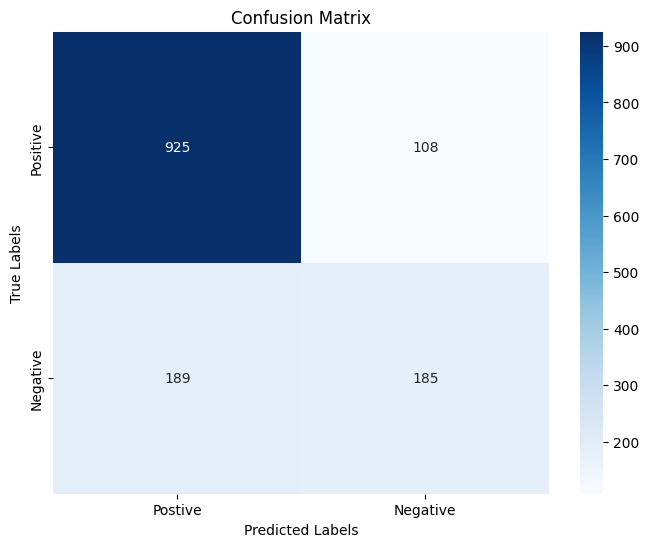

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, 
            yticklabels=['Positive', 'Negative'], 
            xticklabels=['Postive', 'Negative'])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()


# APPLYING XG BOOST USING SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from imblearn.combine import SMOTEENN

# Assuming you have defined SMOTEENN and X earlier

# sm = SMOTEENN()
# X_res, y_res = sm.fit_resample(X, y)

# Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
# model_scores = []

# Create a list of models to evaluate
models = [
    ('XG Boost using Smote', XGBClassifier(random_state=42, max_depth=6))
]

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
         ('model', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)

    # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3), "%")
    print()



Model: XG Boost using Smote
Test Accuracy: 0.948 %



In [ ]:
from xgboost import XGBClassifier

# Assuming you have trained your XGBoost model and named it 'xgb_model'
xgb_model = pipeline.named_steps['model']

# Extract feature importances
importances = xgb_model.feature_importances_

# Get the indices of the top 5 features
top_5_indices_xgb = np.argsort(importances)[-5:]

# Getting the names of the top 5 features
top_5_features_xgb = X.columns[top_5_indices_xgb]

print("Top 5 Features for XGBoost:", top_5_features_xgb)


Top 5 Features for XGBoost: Index(['MonthlyCharges', 'Dependents', 'tenure', 'InternetService',
       'Contract'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Train your model on X_train, y_train and predict on X_test
yr_pred = pipeline.predict(Xr_test)

test_accuracy = accuracy_score(yr_test, yr_pred)
train_accuracy = accuracy_score(yr_train, pipeline.predict(Xr_train))

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.9995753715498938
Test Accuracy: 0.9482173174872666


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, Xr_train, yr_train, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

Cross-Validation Scores: [0.94692144 0.94904459 0.9522293  0.95435244 0.94798301]
Mean CV Score: 0.9501061571125264


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = pipeline.predict(Xr_test)

# Calculate mean squared error
mse = mean_squared_error(yr_test, y_pred)

# Calculate R-squared
r2 = r2_score(yr_test, y_pred)

# Print MSE and R2
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.05178268251273345
R-squared: 0.7903156150057193


In [ ]:
from sklearn.metrics import classification_report


# Train the pipeline on the training data
pipeline.fit(Xr_train, yr_train)

# Make predictions on the test data
y_pred = pipeline.predict(Xr_test)

# Generate classification report
report = classification_report(yr_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       524
           1       0.95      0.96      0.95       654

    accuracy                           0.95      1178
   macro avg       0.95      0.95      0.95      1178
weighted avg       0.95      0.95      0.95      1178



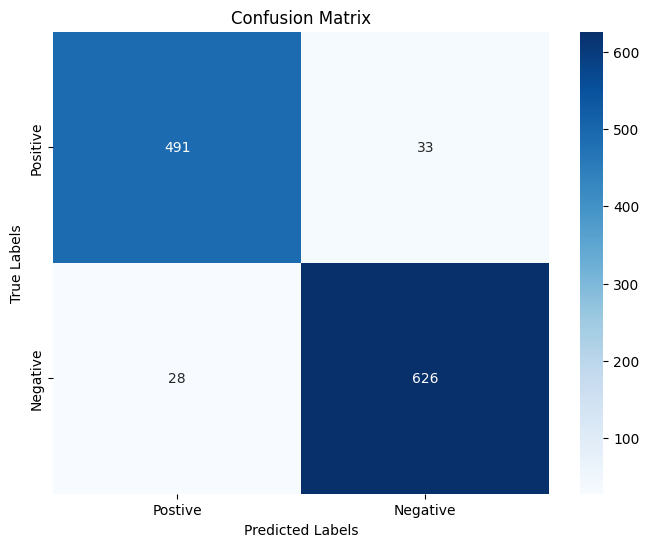

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Compute confusion matrix
conf_matrix = confusion_matrix(yr_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, 
            yticklabels=['Positive', 'Negative'], 
            xticklabels=['Postive', 'Negative'])
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()


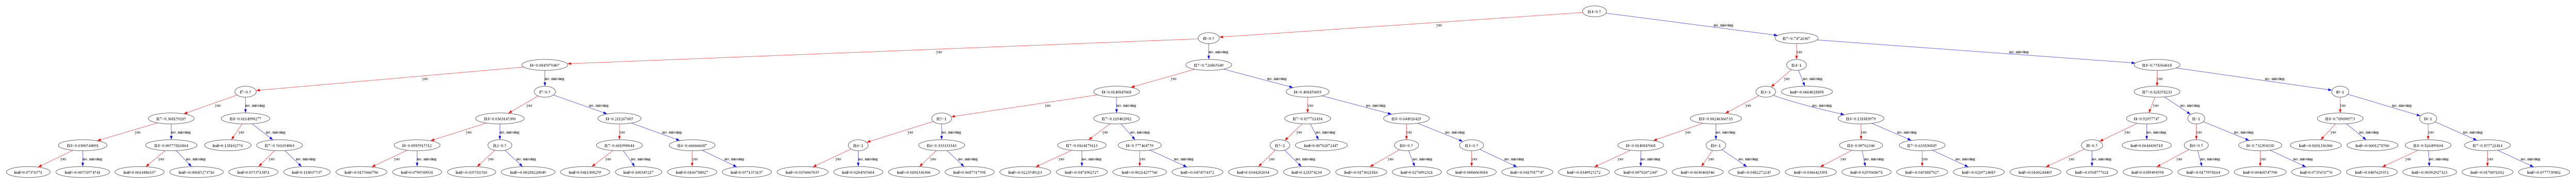

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus

# Assuming grid_search.best_estimator_ contains the best XGBoost model
best_pipeline = grid_search.best_estimator_
best_model = best_pipeline.named_steps['model']

# Plot the tree with adjusted figure size and layout
plt.figure(figsize=(50, 50))
xgb.plot_tree(best_model, ax=plt.gca())
plt.tight_layout()

# Save the figure to a file with increased DPI
plt.savefig('xgboost_tree.png', dpi=300)

# Display the image
#Image('xgboost_tree.png')


In [ ]:
# After appending all the scores to model_scores list
for score in model_scores:
    print(f"Model: {score['Model']}, Accuracy: {round(score['Accuracy'], 3)}")



Model: Logistic Regression, Accuracy: 0.785
Model: Logistic Regression using smote, Accuracy: 0.808
Model: Logistic Regression using lasso, Accuracy: 0.807
Model: Logistic Regression using ridge, Accuracy: 0.8
Model: Support Vector Machine, Accuracy: 0.737
Model: Support Vector Machine using Smote, Accuracy: 0.966
Model: Decision Tree, Accuracy: 0.765
Model: Decision Tree With Smote, Accuracy: 0.927
Model: Random Forest, Accuracy: 0.797
Model: Random Forest using Smote, Accuracy: 0.946
Model: XG Boost, Accuracy: 0.789
Model: XG Boost using Smote, Accuracy: 0.948


In [ ]:
from tabulate import tabulate
df = pd.DataFrame(model_scores)

# Add a column indicating whether SMOTE was used
df['SMOTE'] = df['Model'].apply(lambda x: 'With SMOTE' if 'Smote' in x else 'Without SMOTE')

# Display the DataFrame as a table
print(tabulate(df, headers='keys', tablefmt='pipe', showindex=False))

| Model                              |   Accuracy | SMOTE         |
|:-----------------------------------|-----------:|:--------------|
| Logistic Regression                |   0.784648 | Without SMOTE |
| Logistic Regression using smote    |   0.807841 | Without SMOTE |
| Logistic Regression using lasso    |   0.806873 | Without SMOTE |
| Logistic Regression using ridge    |   0.800097 | Without SMOTE |
| Support Vector Machine             |   0.737029 | Without SMOTE |
| Support Vector Machine using Smote |   0.966044 | With SMOTE    |
| Decision Tree                      |   0.764748 | Without SMOTE |
| Decision Tree With Smote           |   0.926995 | With SMOTE    |
| Random Forest                      |   0.797441 | Without SMOTE |
| Random Forest using Smote          |   0.945671 | With SMOTE    |
| XG Boost                           |   0.788913 | Without SMOTE |
| XG Boost using Smote               |   0.948217 | With SMOTE    |


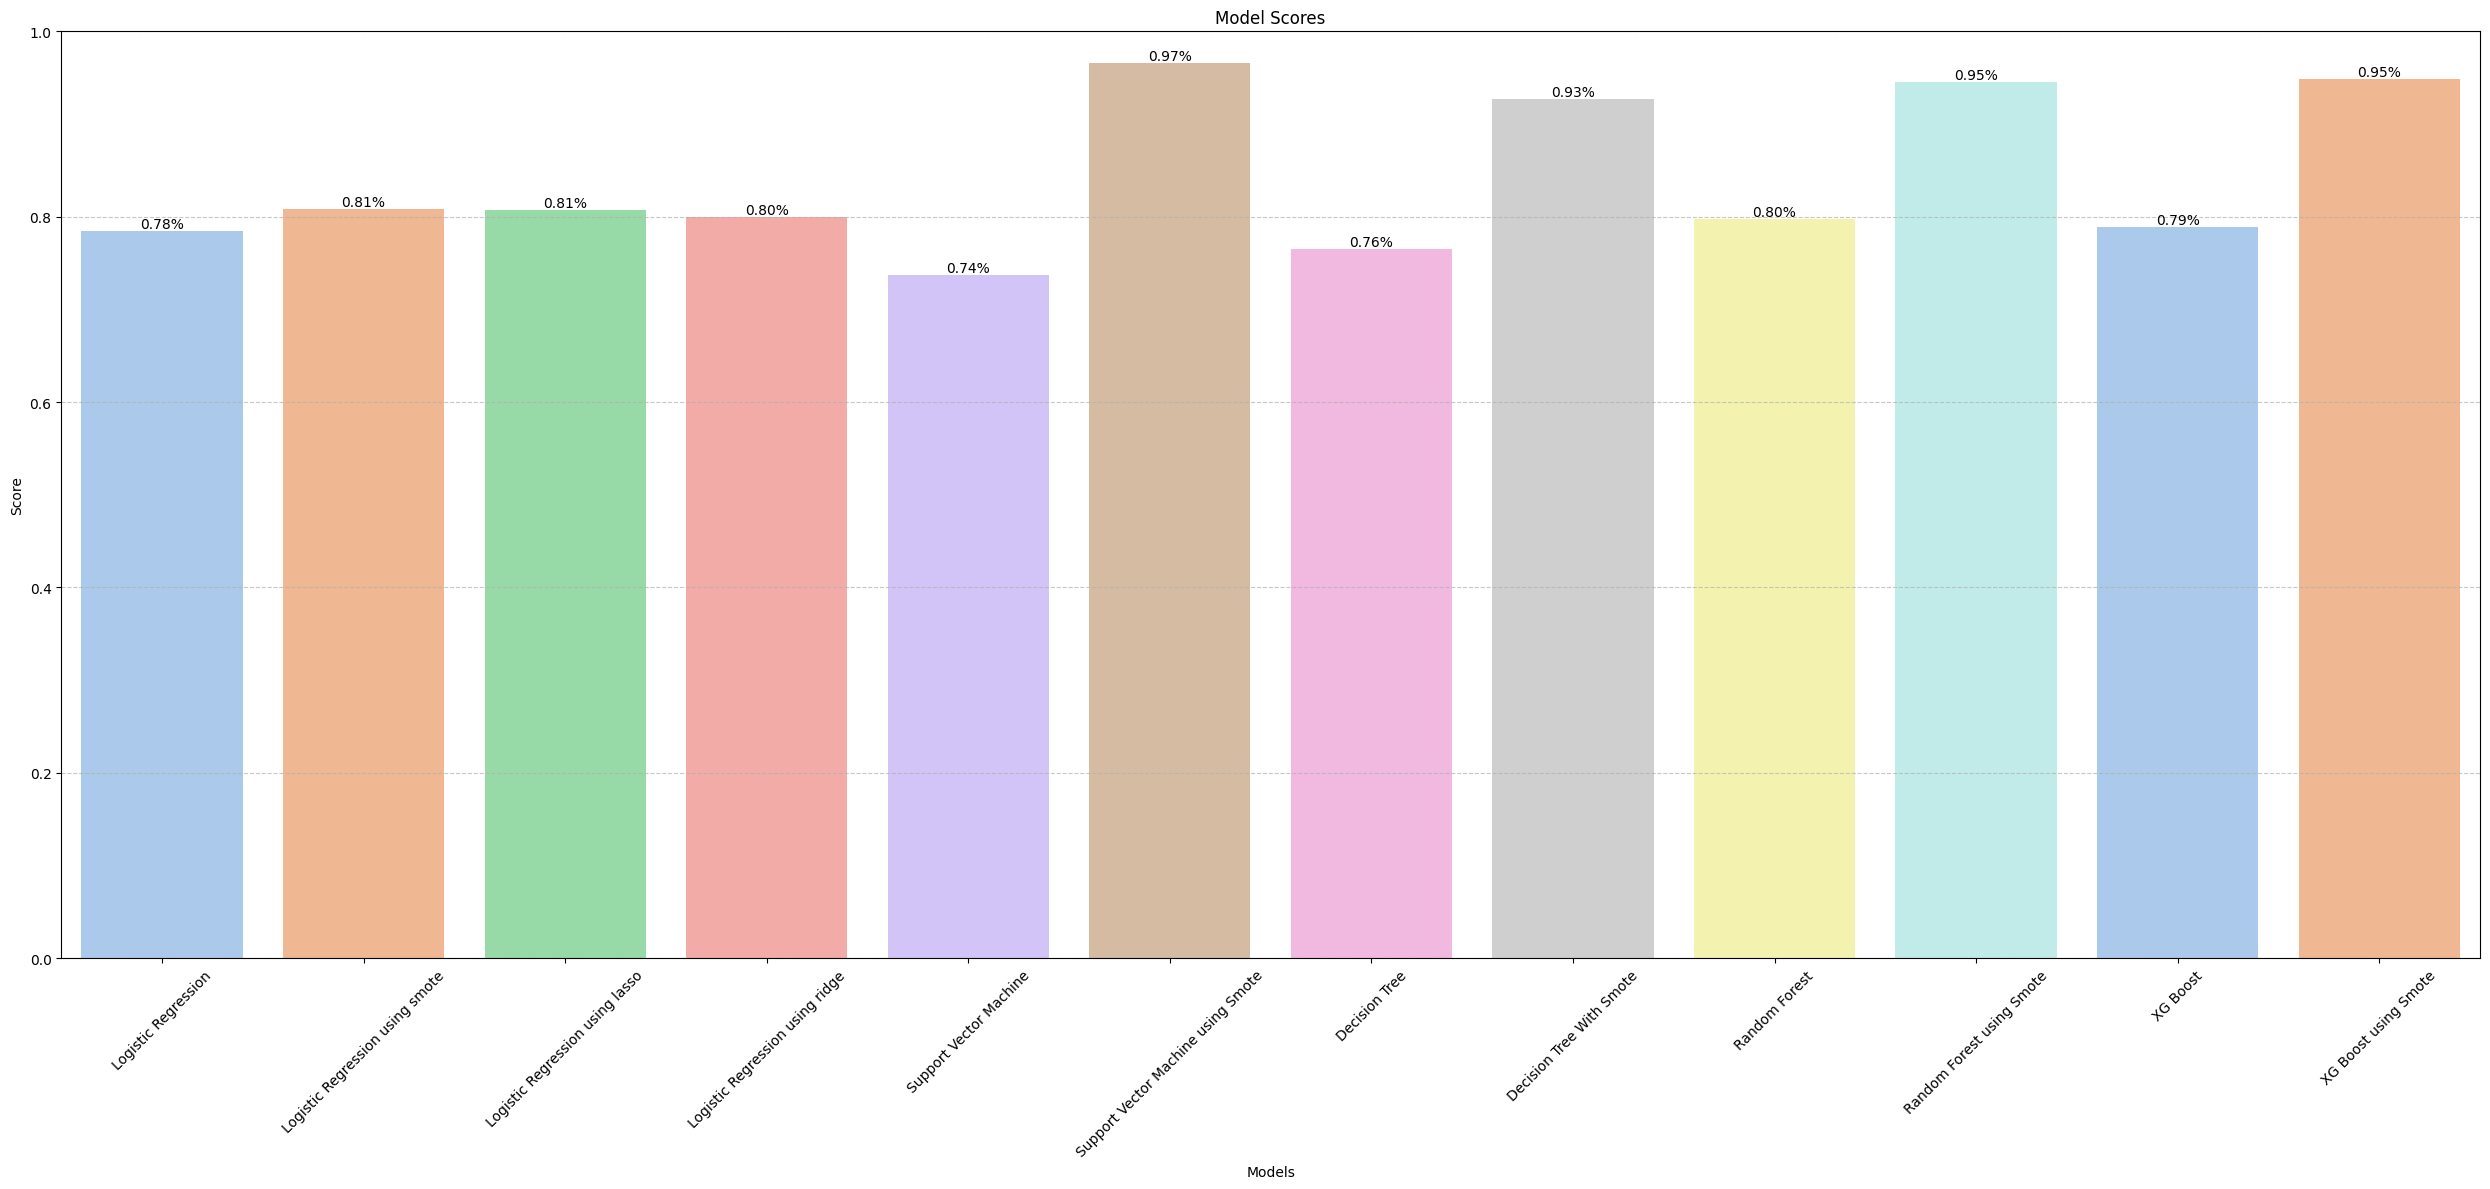

In [ ]:
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(25, 12))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

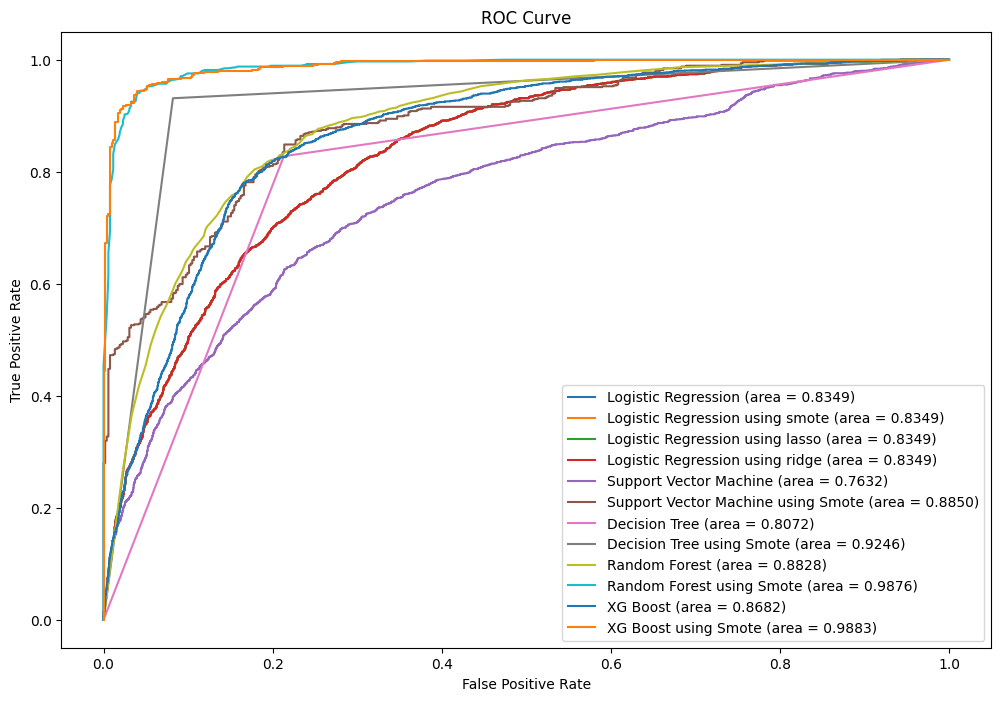

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Logistic Regression using smote': LogisticRegression(),
    'Logistic Regression using lasso': LogisticRegression(),
    'Logistic Regression using ridge': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'Support Vector Machine using Smote': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Decision Tree using Smote': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Random Forest using Smote': RandomForestClassifier(),
    'XG Boost': XGBClassifier(),
    'XG Boost using Smote': XGBClassifier(),
}

# Plot ROC curves
plt.figure(figsize=(12, 8))
for name, clf in classifiers.items():
    if 'Smote' in name:
        X_train = Xr_train
        y_train = yr_train
        X_test = Xr_test
        y_test = yr_test
    else:
        X_train = X_res
        y_train = y_res
        X_test = X
        y_test = y

    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        probas_ = clf.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, probas_[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (area = %0.4f)' % roc_auc)
    else:
        y_pred = clf.predict(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (area = %0.4f)' % roc_auc)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


## TOP FEATURES 

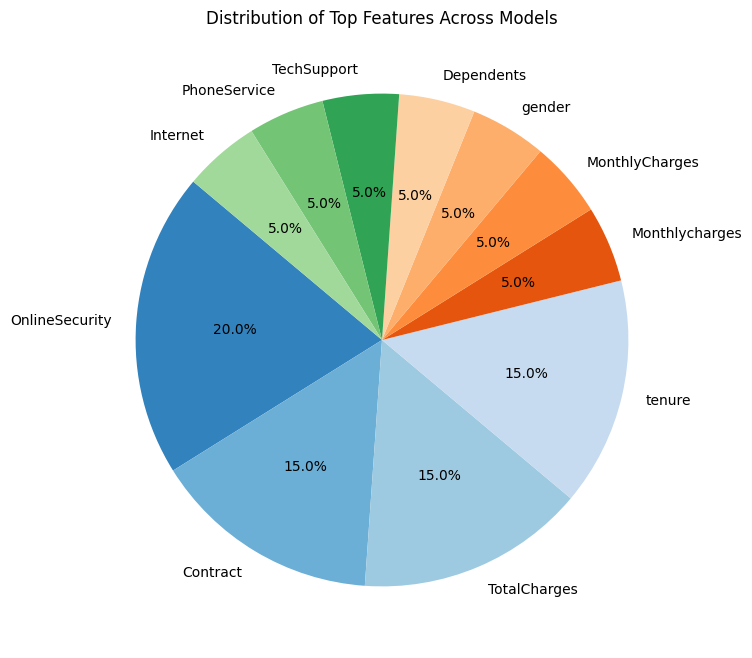

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided DataFrame
df_top_features = pd.DataFrame({
    'Model': ['Decision Trees', 'Random Forest', 'Logistic Regression', 'XG Boost'],
    'Top_5_Features': [['Contract', 'Monthlycharges', 'TotalCharges', 'tenure', 'OnlineSecurity'],
                       ['OnlineSecurity','TotalCharges', 'MonthlyCharges', 'tenure','Contract'],
                       ['gender', 'Dependents', 'TechSupport', 'OnlineSecurity', 'Contract'],
                       ['OnlineSecurity', 'PhoneService','tenure', 'Internet', 'TotalCharges']]
})

# Flatten the list of top 5 features for all models
all_features = [feature for sublist in df_top_features['Top_5_Features'] for feature in sublist]

# Count the occurrence of each feature
feature_counts = pd.Series(all_features).value_counts()

# Plotting
plt.figure(figsize=(12, 8))
feature_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20c.colors)
plt.title('Distribution of Top Features Across Models')
plt.ylabel('')  # To remove the default 'None' label for the y-axis
plt.show()
